# Problem Statement:

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. 
1. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines.
2. Additionally,this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_set=pd.read_csv('zomato.csv')

In [3]:
df_country=pd.read_excel("Country-Code.xlsx")

In [4]:
## set columns option to max
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [5]:
df_set.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df_country.head(10)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [7]:
df=pd.merge(df_set,df_country,on='Country Code',how='left')

In [8]:
df.shape

(9551, 22)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Observation:

### Shows 

- 9551 Rows and 21 Columns

- Float64 columns are 3
- Int64 columns are 5
- Object columns are 14

# About Columns:

-  Restaurant Id: Unique id of every restaurant across various cities of the world
-  Restaurant Name: Name of the restaurant
-  Country Code: Country in which restaurant is located
-  City: City in which restaurant is located
-  Address: Address of the restaurant
-  Locality: Location in the city
-  Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant&#39;s location
-  Latitude: Latitude coordinate of the restaurant&#39;s location
-  Cuisines: Cuisines offered by the restaurant
-  Average Cost for two: Cost for two people in different currencies
-  Currency: Currency of the country
-  Has Table booking: yes/no
-  Has Online delivery: yes/ no
-  Is delivering: yes/ no
-  Switch to order menu: yes/no
-  Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –

1) Average Cost for two
2) Price range

# Checking Null Values

In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

## Observation Shows

- Shows all Values to be intact

Text(0.5, 1.0, 'HeatMap Showing Null Values')

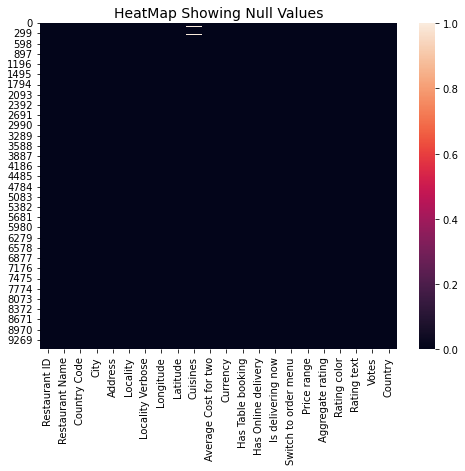

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.title("HeatMap Showing Null Values",fontsize=14)

# Finding Unique Values

In [14]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

### Categorical Columns

In [15]:
for i in df.columns:
    if df[i].dtype=='object':
        print("Column Name ", i)
        print(df[i].unique())
        print('****'*20,"\n")

Column Name  Restaurant Name
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A���k Kahve' "Walter's Coffee Roastery"]
******************************************************************************** 

Column Name  City
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia'
 'Rio de Janeiro' 'S��o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princ

## Numerical Columns

In [16]:
for i in df.columns:
    if df[i].dtype=='int64':
        print("Column Name ", i)
        print(df[i].unique())
        print('****'*20)

Column Name  Restaurant ID
[6317637 6304287 6300002 ... 5915807 5916112 5927402]
********************************************************************************
Column Name  Country Code
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
********************************************************************************
Column Name  Average Cost for two
[  1100   1200   4000   1500   1000   2000   6000    800    900    700
    850    600   3000   1800     55     30     45     60     50     80
     90    200    150    100    230    240    350    140    170    120
    250     40     70    300     85     75    400     65     25     10
      0     20     35      7    270    500    430    315    220     95
    190    260    180    330    280    160    285    130    110   2500
   3600    550   1400    450    950    650   1300   2400   1600   2200
    750   1700   1250   1900   2700   3500   5000   2300   1750   3200
   2100   1850   4500   3300   1350   1650   1950   1050    290   1

## Float Columns

In [17]:
for i in df.columns:
    if df[i].dtype=='float64':
        print("Column Name ", i)
        print(df[i].unique())
        print('****'*20,'\n')

Column Name  Longitude
[121.027535   121.014101   121.056831   ...  29.03464001  29.036019
  29.02601603]
******************************************************************************** 

Column Name  Latitude
[14.565443   14.553708   14.581404   ... 41.05581715 41.057979
 40.98477563]
******************************************************************************** 

Column Name  Aggregate rating
[4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]
******************************************************************************** 



In [18]:
# Rows that doesn't Make importance 
df.drop(['Restaurant ID','Address'],axis=1,inplace=True)

# Checking Duplicated Rows

In [19]:
df.duplicated().sum()

0

#### Nill duplicated Rows

# Percentage of Missing Data

In [20]:
df[df['Cuisines'].isnull()].shape[0]

9

In [21]:
for i in df.columns:
    Total_Value=len(df[i])
    Missing_Value=df[i].isnull().sum()
    print(i ,"Missing percentage :",round(((Missing_Value/Total_Value)*100),2))

Restaurant Name Missing percentage : 0.0
Country Code Missing percentage : 0.0
City Missing percentage : 0.0
Locality Missing percentage : 0.0
Locality Verbose Missing percentage : 0.0
Longitude Missing percentage : 0.0
Latitude Missing percentage : 0.0
Cuisines Missing percentage : 0.09
Average Cost for two Missing percentage : 0.0
Currency Missing percentage : 0.0
Has Table booking Missing percentage : 0.0
Has Online delivery Missing percentage : 0.0
Is delivering now Missing percentage : 0.0
Switch to order menu Missing percentage : 0.0
Price range Missing percentage : 0.0
Aggregate rating Missing percentage : 0.0
Rating color Missing percentage : 0.0
Rating text Missing percentage : 0.0
Votes Missing percentage : 0.0
Country Missing percentage : 0.0


## Observation 

- Shows 9 percent Data is missing in Cuisines

# Replace Nan Values

In [22]:
# using back fill mathord to maintain varity

df['Cuisines']=df['Cuisines'].fillna(method='backfill')

# Null Values

In [23]:
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Text(0.5, 1.0, 'HeatMap Showing No Null Values ')

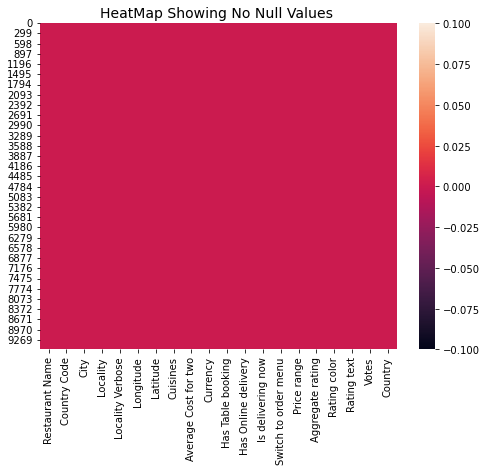

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.title("HeatMap Showing No Null Values ",fontsize=14)

# EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='Country Code', ylabel='count'>

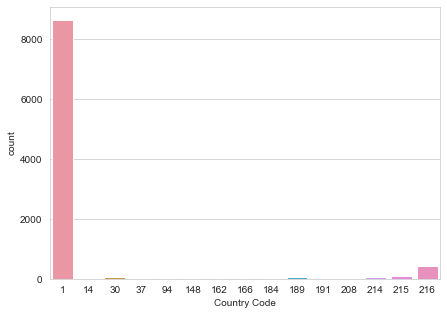

In [25]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.countplot(data=df,x='Country Code',)

In [26]:
print("Columns Shows Country Code\n",df['Country Code'].value_counts())

Columns Shows Country Code
 1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


Maximum Resturant is from Country Number 1

In [27]:
df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [28]:
Restaurants_Counts=df.groupby(['Country','Country Code']).size().reset_index().rename(columns={0:'Rating Count'})
Restaurants_Counts

,Country,Country Code,Rating Count
0,Australia,14,24
1,Brazil,30,60
2,Canada,37,4
3,India,1,8652
4,Indonesia,94,21
5,New Zealand,148,40
6,Phillipines,162,22
7,Qatar,166,20
8,Singapore,184,20
9,South Africa,189,60


Canada               4
Singapore           20
Qatar               20
Sri Lanka           20
Indonesia           21
Phillipines         22
Australia           24
Turkey              34
New Zealand         40
Brazil              60
UAE                 60
South Africa        60
United Kingdom      80
United States      434
India             8652
Name: Country, dtype: int64


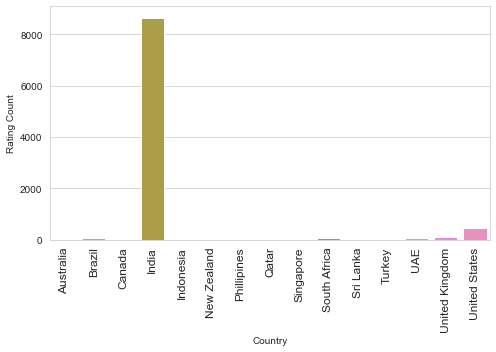

In [29]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.barplot(data=Restaurants_Counts,y='Rating Count',x='Country')
print(df['Country'].value_counts(ascending=True))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=10)
plt.tight_layout()

Maximum Resturants are from India

In [30]:
df.groupby(['Restaurant Name','City']).size().sum()

9551

Total 9551 resturants in citys

In [31]:
df.groupby(['Country','City','Votes'],squeeze=False,sort=False).size().reset_index()

,Country,City,Votes,0
0,Phillipines,Makati City,314,1
1,Phillipines,Makati City,591,1
2,Phillipines,Mandaluyong City,270,1
3,Phillipines,Mandaluyong City,365,1
4,Phillipines,Mandaluyong City,229,1
...,...,...,...,...
2814,Turkey,��stanbul,788,1
2815,Turkey,��stanbul,1034,1
2816,Turkey,��stanbul,661,1
2817,Turkey,��stanbul,901,1


In [32]:
Total_Rating=df.groupby(['Aggregate rating','Rating color']).size().reset_index().rename(columns={0:'Rating Counts'})
Total_Rating

,Aggregate rating,Rating color,Rating Counts
0,0.0,White,2148
1,1.8,Red,1
2,1.9,Red,2
3,2.0,Red,7
4,2.1,Red,15
5,2.2,Red,27
6,2.3,Red,47
7,2.4,Red,87
8,2.5,Orange,110
9,2.6,Orange,191


Red            186
Dark Green     301
Green         1079
Yellow        2100
White         2148
Orange        3737
Name: Rating color, dtype: int64


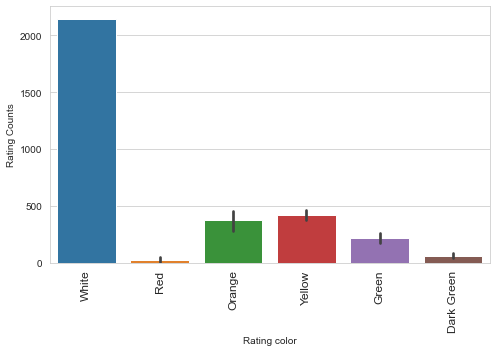

In [33]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.barplot(data=Total_Rating,y='Rating Counts',x='Rating color')
print(df['Rating color'].value_counts(ascending=True))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=10)
plt.tight_layout()

- Maximum is White (Unrated)
- Red            186
- Dark Green     301
- Green         1079
- Yellow        2100
- White         2148
- Orange        3737

Chart Aggregate Rating Lies from 0 to 4.9

In [34]:
Ratings=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
Ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Poor          186
Excellent     301
Very Good    1079
Good         2100
Not rated    2148
Average      3737
Name: Rating text, dtype: int64


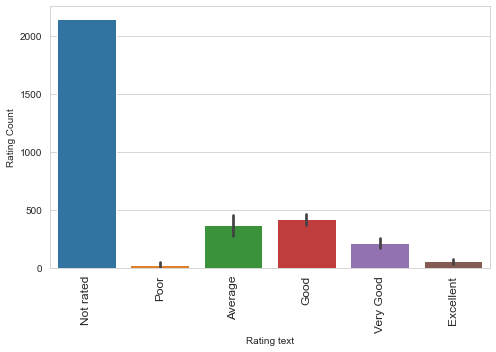

In [35]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.barplot(data=Ratings,y='Rating Count',x='Rating text')
print(df['Rating text'].value_counts(ascending=True))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=10)
plt.tight_layout()

## Observation Shows

- White 2148(Not Rated)
- Red Shows Poor
- Orange shows Average
- Yellow shows Good
- Green shows Very Good
- Dark Green Shows Excellent

In [36]:
Tdelivery=df.groupby(['Aggregate rating', 'Rating color','Country','Is delivering now']).size().reset_index().rename(columns={0:'Rating Count'})
Tdelivery

,Aggregate rating,Rating color,Country,Is delivering now,Rating Count
0,0.0,White,Brazil,No,5
1,0.0,White,India,No,2138
2,0.0,White,India,Yes,1
3,0.0,White,United Kingdom,No,1
4,0.0,White,United States,No,3
...,...,...,...,...,...
234,4.9,Dark Green,Sri Lanka,No,1
235,4.9,Dark Green,Turkey,No,3
236,4.9,Dark Green,UAE,No,4
237,4.9,Dark Green,United Kingdom,No,4


<AxesSubplot:xlabel='Is delivering now', ylabel='count'>

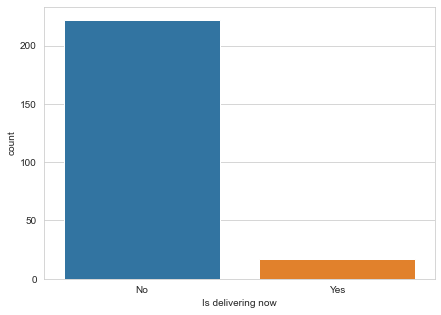

In [37]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.countplot(data=Tdelivery,x='Is delivering now')

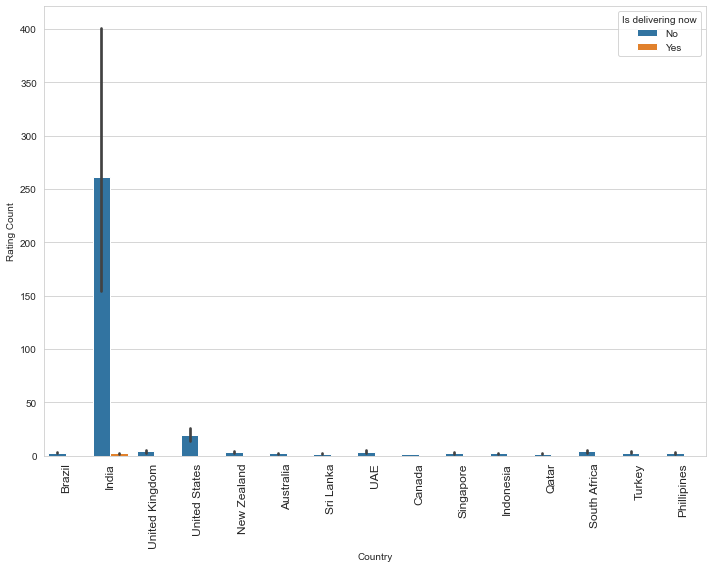

In [38]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.barplot(data=Tdelivery,hue='Is delivering now',x='Country',y='Rating Count')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=10)
plt.tight_layout()

- Maximum Places delivery is Not Available
- Max Facility is available in india than other country

In [39]:
delivery=df.groupby(['Country','Has Online delivery']).size().reset_index().rename(columns={0:'Rating Count'})
delivery

,Country,Has Online delivery,Rating Count
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


<AxesSubplot:xlabel='Has Online delivery', ylabel='Rating Count'>

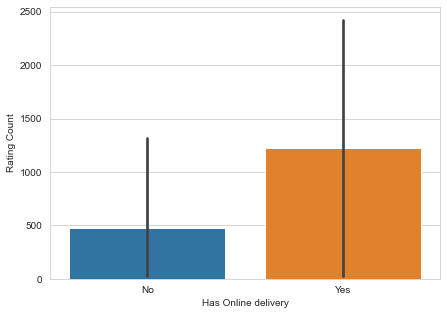

In [40]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.barplot(data=delivery,x='Has Online delivery',y='Rating Count')

Graph Shows Maximum is online Delivery 

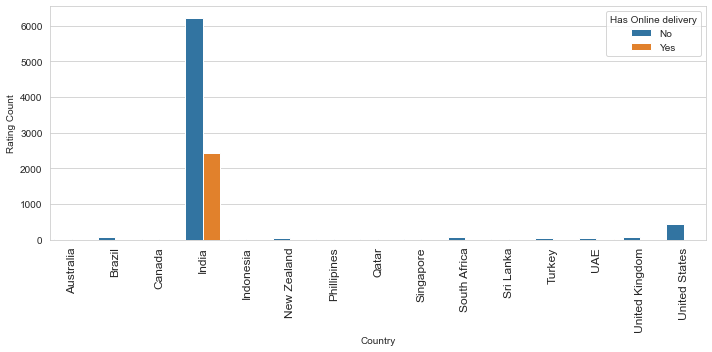

In [41]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.barplot(data=delivery,x='Country',y='Rating Count',hue='Has Online delivery')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=10)
plt.tight_layout()

India Having Maximum order from India. Online order is maximum availed in India

In [42]:
Table=df.groupby(['Country','Has Table booking']).size().reset_index().rename(columns={0:'Rating Count'})
Table

,Country,Has Table booking,Rating Count
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,7541
4,India,Yes,1111
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,8
8,Phillipines,Yes,14
9,Qatar,No,19


No     8393
Yes    1158
Name: Has Table booking, dtype: int64


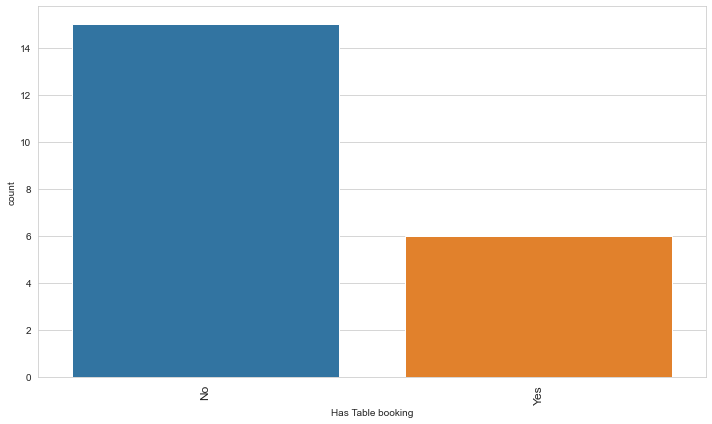

In [43]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.countplot(data=Table,x='Has Table booking')
print(df['Has Table booking'].value_counts())
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=10)
plt.tight_layout()

Has Table booking shows Maximum NO and YES is very less

No     8393
Yes    1158
Name: Has Table booking, dtype: int64


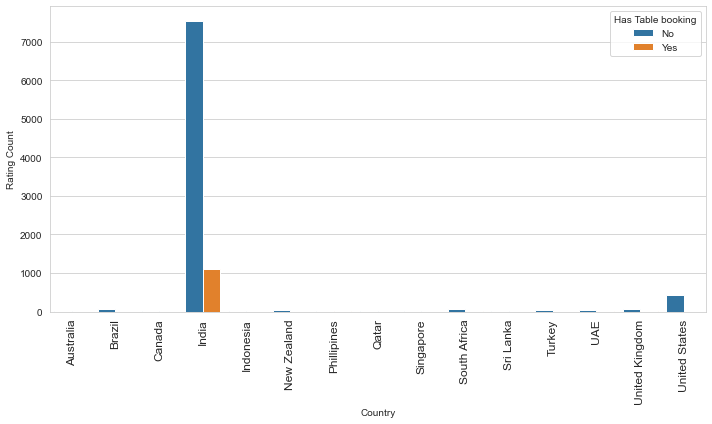

In [44]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=Table,x='Country',y='Rating Count',hue='Has Table booking')
print(df['Has Table booking'].value_counts())
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=10)
plt.tight_layout()

India Having maximum table booking Facility 

In [45]:
Money=df.groupby(['Currency','Country']).size().reset_index().rename(columns={0:'Rating Count'})
Money

,Currency,Country,Rating Count
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(��)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64


<Figure size 720x432 with 0 Axes>

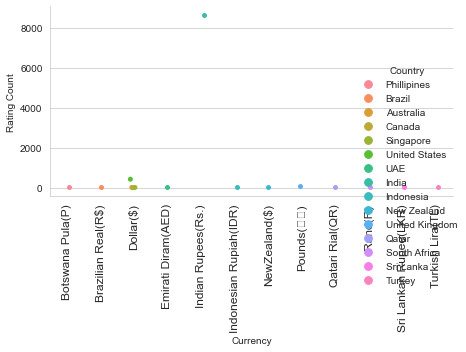

In [46]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.catplot(data=Money,hue='Country',y='Rating Count',x='Currency')
print(df['Currency'].value_counts())
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=10)
plt.tight_layout()

In [47]:
Money2=df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index().rename(columns={0:'Rating Count'})
Money2

,Country,Currency,Rating Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(��)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64


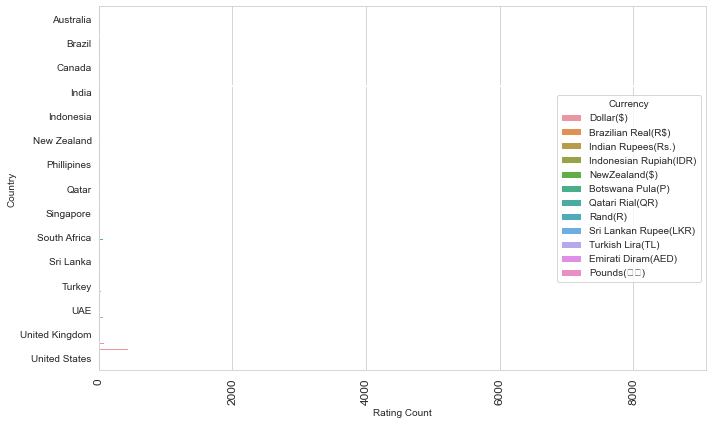

In [48]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=Money2,x='Rating Count',hue='Currency',y='Country')
print(df['Currency'].value_counts())
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=10)
plt.tight_layout()

In [49]:
df[df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

Only India has online Delivery along with Use

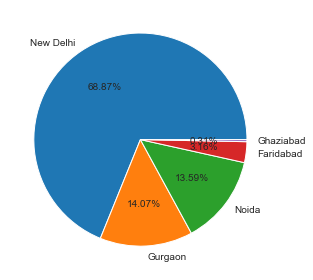

In [50]:
# checking for top 5
city_values=df.City.value_counts().values
city_index =df.City.value_counts().index

plt.pie(city_values[:5],labels=city_index[:5],autopct='%1.2f%%')
plt.tight_layout()

In [51]:
dish=df[['Aggregate rating','Cuisines']].groupby(['Aggregate rating','Cuisines']).size().reset_index()
dish.rename(columns={0:'Count'}) 

,Aggregate rating,Cuisines,Count
0,0.0,Afghani,3
1,0.0,"Afghani, Mughlai, Chinese",1
2,0.0,"Afghani, North Indian",1
3,0.0,"Afghani, North Indian, Pakistani, Arabian",1
4,0.0,American,2
...,...,...,...
3923,4.9,"Sunda, Indonesian",3
3924,4.9,"Sushi, Japanese",1
3925,4.9,"Taiwanese, Street Food",1
3926,4.9,Tapas,1


In [52]:
top_10dish=dish.iloc[3913:]

In [53]:
dish.sort_index(axis=0,ascending=False)

,Aggregate rating,Cuisines,0
3927,4.9,World Cuisine,1
3926,4.9,Tapas,1
3925,4.9,"Taiwanese, Street Food",1
3924,4.9,"Sushi, Japanese",1
3923,4.9,"Sunda, Indonesian",3
...,...,...,...
4,0.0,American,2
3,0.0,"Afghani, North Indian, Pakistani, Arabian",1
2,0.0,"Afghani, North Indian",1
1,0.0,"Afghani, Mughlai, Chinese",1


In [54]:
c_order_m=df.groupby(['Country','Switch to order menu']).size().reset_index().rename(columns={0:'Rating Count'})
c_order_m

,Country,Switch to order menu,Rating Count
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,8652
4,Indonesia,No,21
5,New Zealand,No,40
6,Phillipines,No,22
7,Qatar,No,20
8,Singapore,No,20
9,South Africa,No,60


No    9551
Name: Switch to order menu, dtype: int64


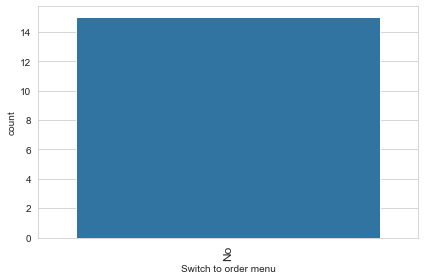

In [55]:
plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
sns.countplot(data=c_order_m,x='Switch to order menu')
print(df['Switch to order menu'].value_counts())
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=10)
plt.tight_layout()

Big NO for Switching All the country

In [56]:
c_price=df.groupby(['Country','Price range']).size().reset_index().rename(columns={0:'Rating Count'})
c_price

,Country,Price range,Rating Count
0,Australia,1,4
1,Australia,2,14
2,Australia,3,5
3,Australia,4,1
4,Brazil,1,2
5,Brazil,2,7
6,Brazil,3,16
7,Brazil,4,35
8,Canada,2,3
9,Canada,4,1


1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


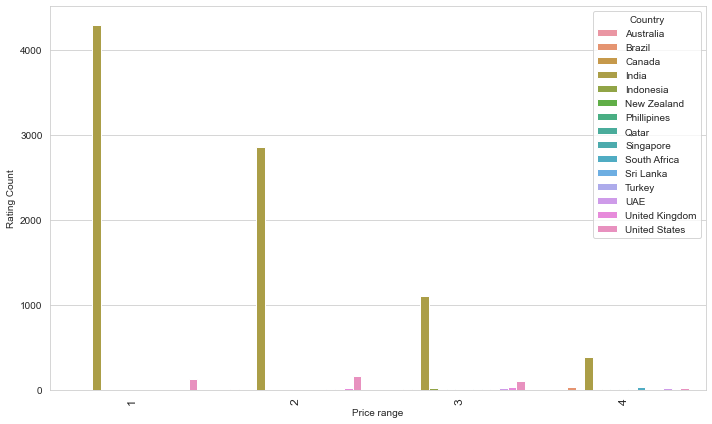

In [57]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=c_price,y='Rating Count',x='Price range',hue='Country')
print(df['Price range'].value_counts())
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=10)
plt.tight_layout()

Maximum Price Range is lies in 1

In [58]:
df.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Locality Verbose      9551 non-null   object 
 5   Longitude             9551 non-null   float64
 6   Latitude              9551 non-null   float64
 7   Cuisines              9551 non-null   object 
 8   Average Cost for two  9551 non-null   int64  
 9   Currency              9551 non-null   object 
 10  Has Table booking     9551 non-null   object 
 11  Has Online delivery   9551 non-null   object 
 12  Is delivering now     9551 non-null   object 
 13  Switch to order menu  9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [60]:
df.drop(['Restaurant Name','Switch to order menu'],axis=1,inplace=True)

# Label Encoder

In [61]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])
df.head(3)

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,73,171,172,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,162,73,593,601,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,162,75,308,314,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6


# Descriptive Statistics

In [62]:
df.describe(include='all')

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,78.301434,658.128678,677.305204,64.126574,25.854381,988.991310,1199.210763,3.977699,0.121244,0.256622,0.003560,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,56.750546,23.198915,315.866877,331.727817,41.467058,11.007935,514.449306,16121.183073,0.914242,0.326428,0.436792,0.059561,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,1.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,76.000000,381.000000,387.000000,77.081343,28.478713,497.000000,250.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,1.000000,88.000000,696.000000,707.000000,77.191964,28.570469,1126.000000,400.000000,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,1.000000,88.000000,921.000000,953.000000,77.282006,28.642758,1354.000000,700.000000,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,216.000000,140.000000,1207.000000,1264.000000,174.832089,55.976980,1824.000000,800000.000000,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


## Descriptive Map

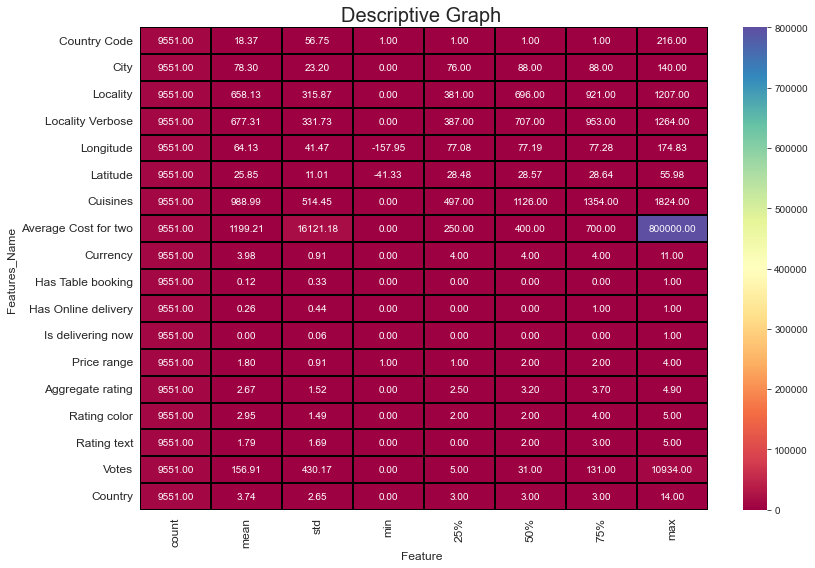

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.describe().T,annot=True,fmt='0.2f',linecolor='black',linewidth=0.02,cmap='Spectral')
plt.xlabel("Feature ", fontsize=12)
plt.ylabel("Features_Name ",fontsize=12)
plt.title("Descriptive Graph ",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

## Few Observation:

- Null Values = No Null Values.
- Right Skewed= Average Cost for two,Votes
- Left Skewed = City, Locality,Locality Verbose, Longitude, Latitude, Cuisines,
- Standard    = Country Code ,Locality,Locality Verbose, Longitude, Average Cost for two,
- Outliers    = Country Code ,Locality, Locality Verbose, Longitude, Cuisines,Average Cost for two, Votes

# Correlation Graph

In [64]:
df.corr()

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Country Code,1.000000,-0.181728,-0.120076,-0.117543,-0.698299,0.019792,-0.136016,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,0.243327,0.282189,-0.187174,0.222685,0.154530,0.968700
City,-0.181728,1.000000,0.096443,0.093141,0.117391,-0.004301,0.028078,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.078406,-0.180959
Locality,-0.120076,0.096443,1.000000,0.999465,0.086446,-0.020428,0.007895,-0.012136,0.023718,-0.065594,-0.030993,-0.007299,-0.114457,-0.174336,0.036832,-0.036969,-0.123569,-0.118786
Locality Verbose,-0.117543,0.093141,0.999465,1.000000,0.084340,-0.020909,0.006846,-0.011852,0.022960,-0.065132,-0.031766,-0.007353,-0.112311,-0.173253,0.037104,-0.035430,-0.122877,-0.116408
Longitude,-0.698299,0.117391,0.086446,0.084340,1.000000,0.043207,0.129273,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.085101,-0.766221
Latitude,0.019792,-0.004301,-0.020428,-0.020909,0.043207,1.000000,0.037422,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,-0.022962,0.181299
Cuisines,-0.136016,0.028078,0.007895,0.006846,0.129273,0.037422,1.000000,0.005895,0.070854,0.050952,-0.016093,0.007823,-0.005439,-0.080903,-0.017584,-0.079785,-0.032455,-0.131426
Average Cost for two,0.043225,-0.028838,-0.012136,-0.011852,0.045891,-0.111088,0.005895,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.067783,-0.004034
Currency,-0.033466,-0.071996,0.023718,0.022960,0.337334,-0.101864,0.070854,0.045615,1.000000,0.000640,0.006991,0.001458,0.075179,-0.006939,-0.040430,0.014598,-0.027111,-0.105296
Has Table booking,-0.061682,-0.003762,-0.065594,-0.065132,0.100488,0.054658,0.050952,0.007758,0.000640,1.000000,0.101224,-0.016816,0.501925,0.189998,-0.021365,0.044043,0.169422,-0.062076


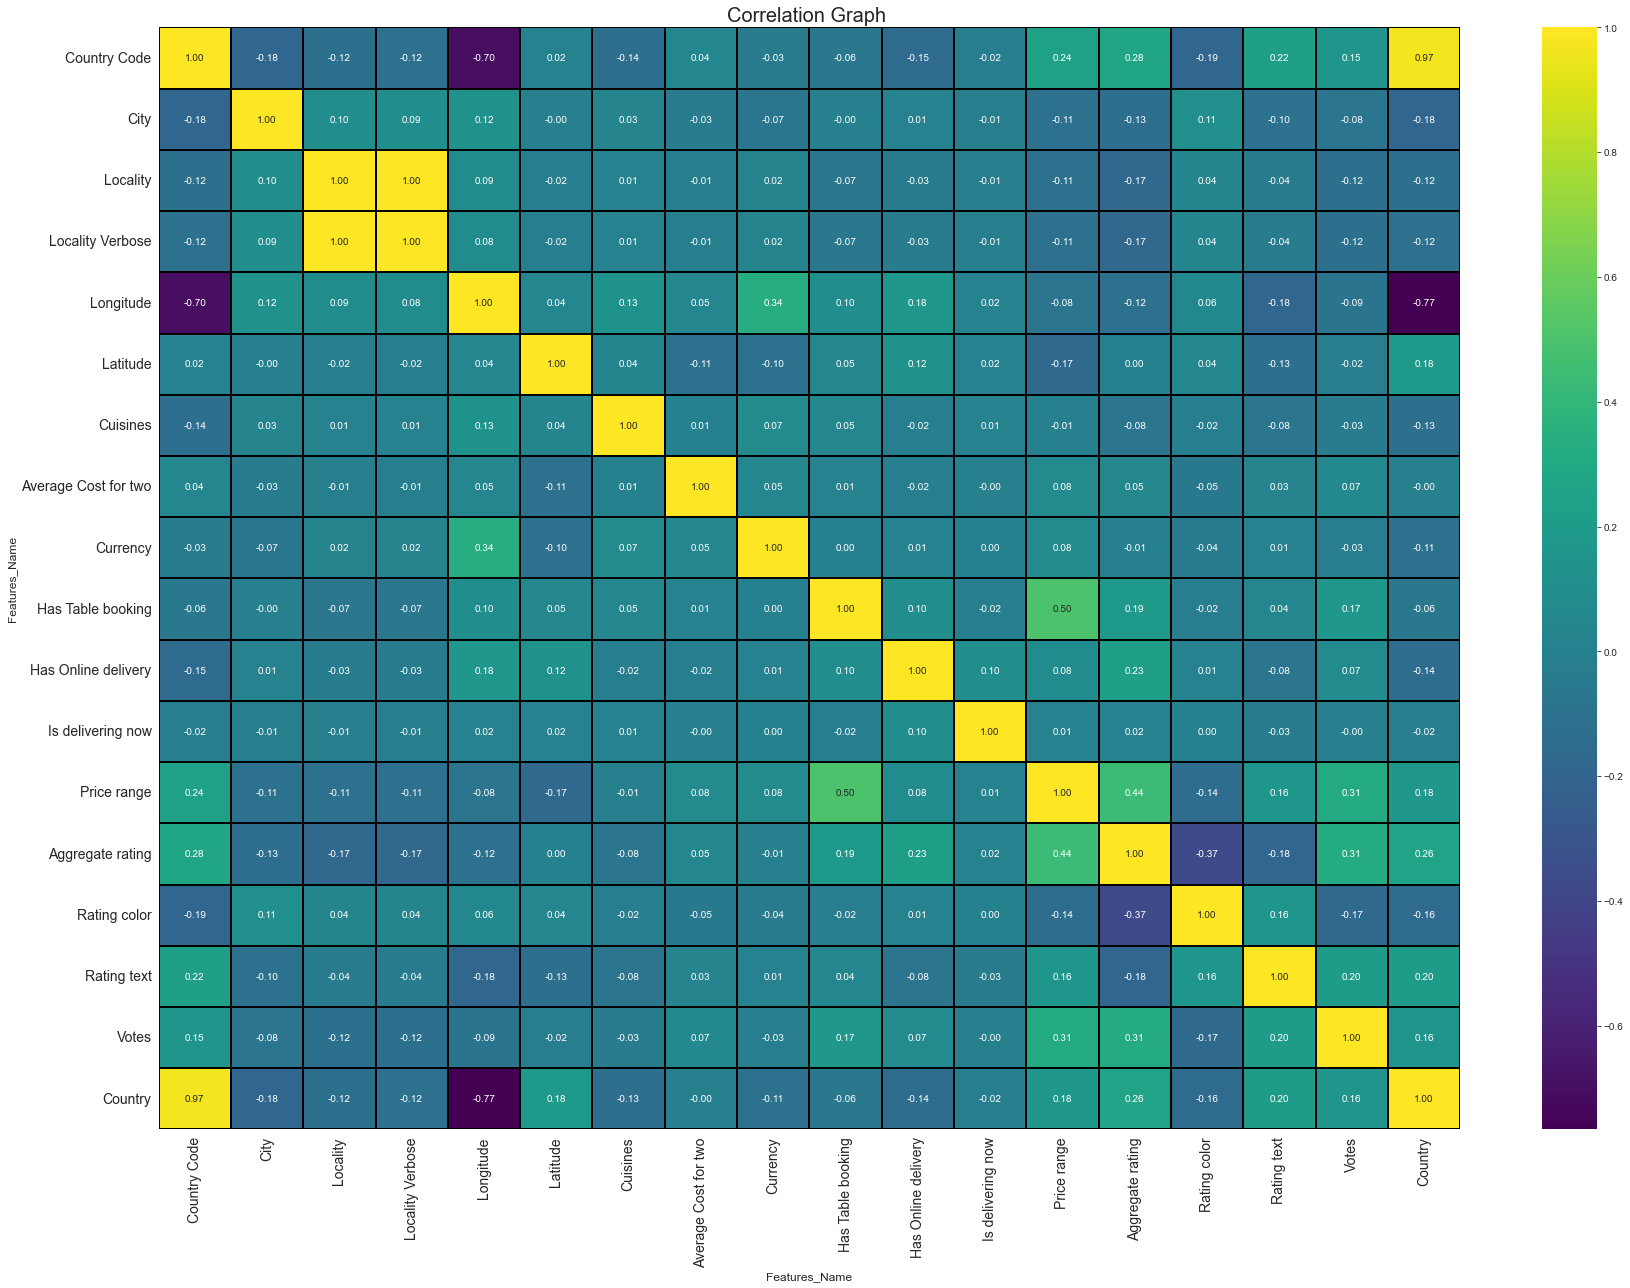

In [65]:
plt.figure(figsize=(25,18))
sns.heatmap(data=df.corr(),annot=True,fmt='0.2f',linecolor='black',linewidth=0.02,cmap='viridis')
plt.xlabel("Features_Name", fontsize=12)
plt.ylabel("Features_Name",fontsize=12)
plt.title("Correlation Graph ",fontsize=20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.tight_layout()

# Model 1

In [66]:
df.corr()['Price range'].sort_values()

Latitude               -0.166688
Rating color           -0.140468
Locality               -0.114457
Locality Verbose       -0.112311
City                   -0.105759
Longitude              -0.078939
Cuisines               -0.005439
Is delivering now       0.010940
Average Cost for two    0.075083
Currency                0.075179
Has Online delivery     0.077918
Rating text             0.164242
Country                 0.178035
Country Code            0.243327
Votes                   0.309444
Aggregate rating        0.437944
Has Table booking       0.501925
Price range             1.000000
Name: Price range, dtype: float64

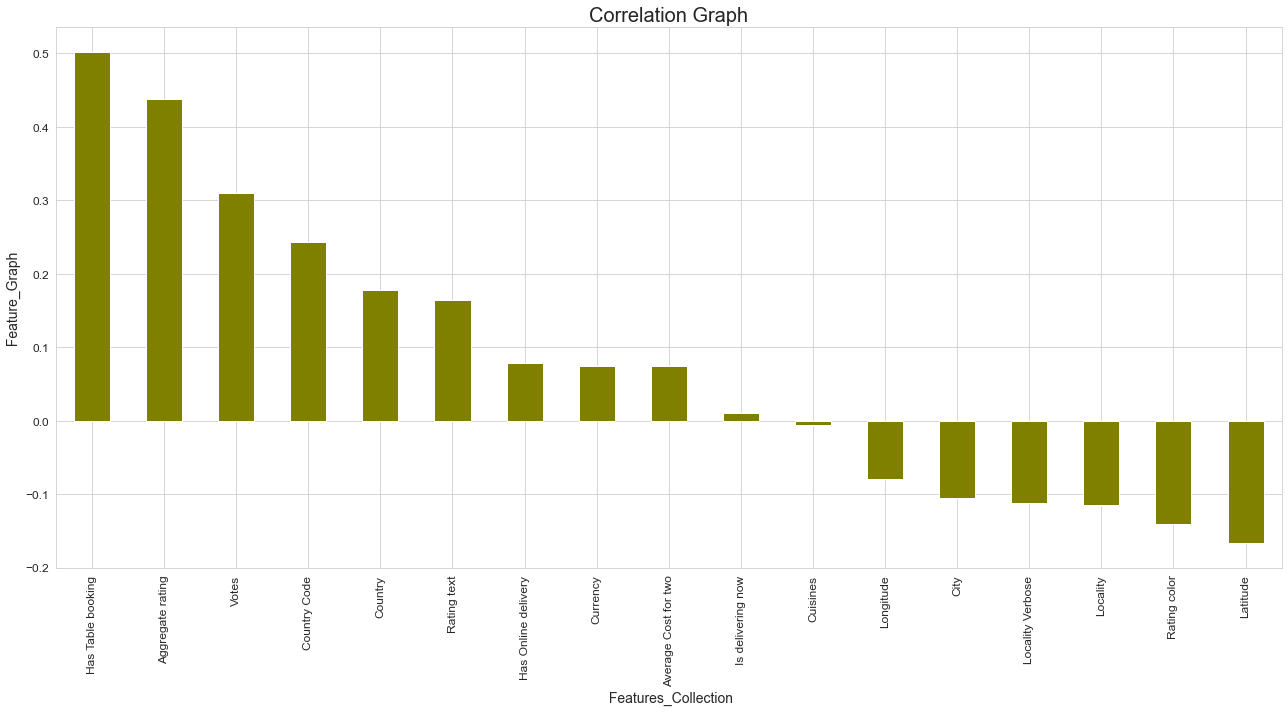

In [67]:
plt.figure(figsize=(18,10))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='olive')
plt.xlabel(" Features_Collection",fontsize=14)
plt.ylabel(" Feature_Graph ",fontsize=14)
plt.title("Correlation Graph",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

# Observation Shows

- Latitude             : Shows 17 percentage negatively correlated with the target variable. 
- Rating color         : Shows 14 percentage negatively correlated with the target variable.
- Locality             : Shows 12 percentage negatively correlated with the target variable.
- Locality Verbose     : Shows 11 percentage negatively correlated with the target variable.
- City                 : Shows 11 percentage negatively correlated with the target variable.
- Longitude            : Shows 08 percentage negatively correlated with the target variable.
- Cuisines             : Shows 05 percentage negatively correlated with the target variable.
- Is delivering now    : Shows 1 percentage positively correlated with the target variable.
- Average Cost for two : Shows 8 percentage positively correlated with the target variable.
- Currency             : Shows 8 percentage positively correlated with the target variable.
- Has Online delivery  : Shows 8 percentage positively correlated with the target variable. 
- Rating text          : Shows 16 percentage positively correlated with the target variable. 
- Country              : Shows 18 percentage positively correlated with the target variable.
- Country Code         : Shows 24 percentage positively correlated with the target variable.
- Votes                : Shows 31 percentage positively correlated with the target variable.    
- Aggregate rating     : Shows 44 percentage positively correlated with the target variable.   
- Has Table booking    : Shows 50 percentage positively correlated with the target variable.  
- Price range          : Shows 100 percentage positively correlated with the target variable. 

### NOTE:

- Latitude : 17 percentage very Week Bond.
- Price : 100 percentage correlated to itself.
- Has Table booking : 50  percentage very strong Bond.

#  Model 2

In [68]:
df.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Locality Verbose       -0.011852
Country                -0.004034
Is delivering now      -0.001862
Cuisines                0.005895
Has Table booking       0.007758
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64

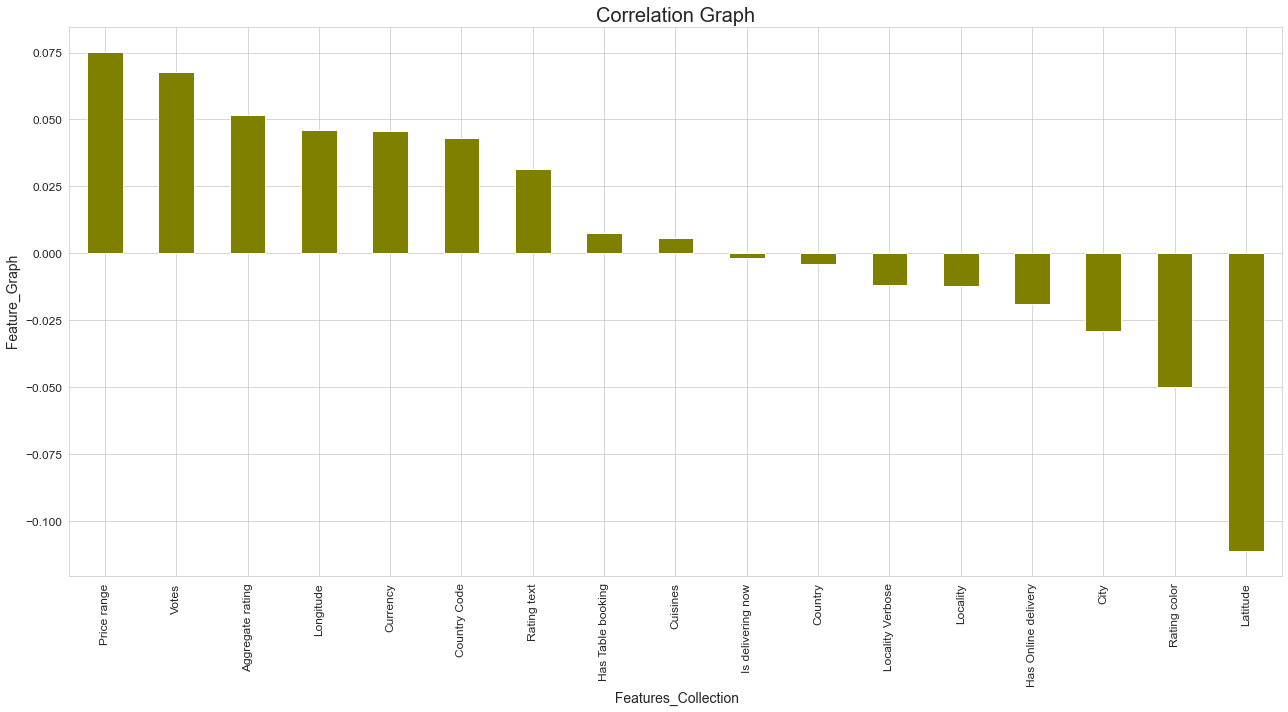

In [69]:
plt.figure(figsize=(18,10))
df.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='olive')
plt.xlabel(" Features_Collection",fontsize=14)
plt.ylabel(" Feature_Graph ",fontsize=14)
plt.title("Correlation Graph",fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

# Observation:

- Latitude    : Shows 11 percentage negatively correlated with the target variable.    
- Rating color: Shows 05 percentage negatively correlated with the target variable. 
- City        : Shows 03 percentage negatively correlated with the target variable. 
- Has Online delivery  : Shows 02 percentage negatively correlated with the target variable.
- Locality    : Shows 1 percentage negatively correlated with the target variable.
- Locality Verbose  : Shows 1 percentage negatively correlated with the target variable.
- Country      :  Shows 0 percentage negatively correlated with the target variable.
- Is delivering now : Shows 0 percentage negatively correlated with the target variable.
- Cuisines  :  : Shows 1 percentage positively correlated with the target variable.
- Has Table booking   : Shows 1 percentage positively correlated with the target variable.
- Rating text   : Shows 3 percentage positively correlated with the target variable.
- Country Code   : Shows 4 percentage positively correlated with the target variable.
- Currency      : Shows 5 percentage positively correlated with the target variable.  
- Longitude        : Shows 5 percentage positively correlated with the target variable.
- Aggregate rating  : Shows 5 percentage positively correlated with the target variable.
- Votes    : Shows 7 percentage positively correlated with the target variable. 
- Price range   : Shows 8 percentage positively correlated with the target variable.
- Average Cost for two  : Shows 100 percentage positively correlated with the target variable.

## NOTE:

- Price Range- Is very positive correlaed with Target variable Strong Bond
- Average cost for two- Target variable
- Latitude poorly correlated

# Outliers

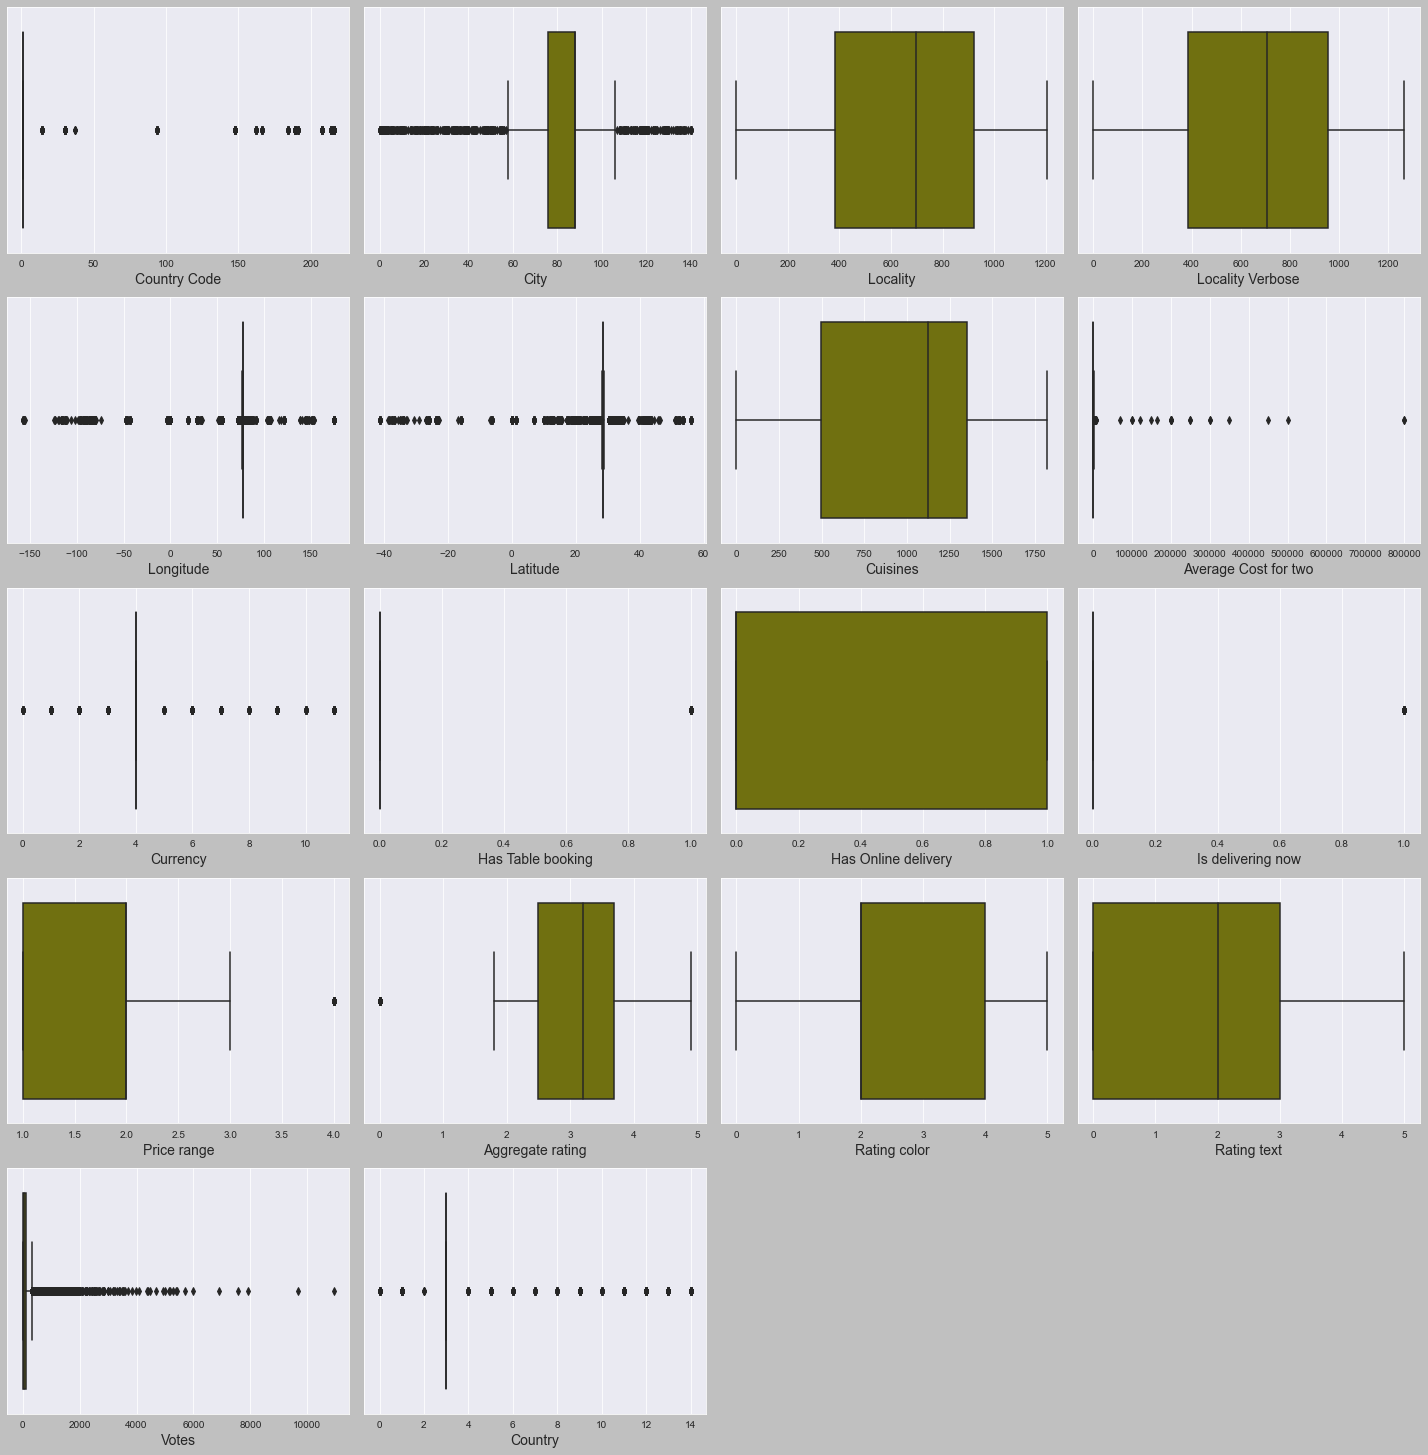

In [70]:
plt.figure(figsize=(20,40),facecolor='silver',edgecolor='black',)

plotnumber=1

for column in df:
    if plotnumber<=40 : 
        sns.set_style('darkgrid')
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[column],color='olive')
        plt.xlabel(column , fontsize=14)
        
    plotnumber+=1
plt.tight_layout()

# Observations Shows

- Minimum Outliers

- Maximum Outliers


# Skewness

In [71]:
df.skew().sort_values()

Latitude                -3.081635
Longitude               -2.807328
City                    -1.193777
Aggregate rating        -0.954130
Cuisines                -0.305680
Locality                -0.253550
Locality Verbose        -0.183059
Rating color             0.046009
Rating text              0.431408
Price range              0.889618
Has Online delivery      1.114620
Has Table booking        2.321100
Currency                 2.858093
Country Code             3.043965
Country                  3.312721
Votes                    8.807637
Is delivering now       16.673412
Average Cost for two    35.477915
dtype: float64

### Observation

Skewness Threshold to be taken +/- 65. Following Shows High Skewness

- Latitude                -3.081635
- Longitude               -2.807328
- City                    -1.193777
- Aggregate rating        -0.954130
- Has Online delivery      1.114620
- Has Table booking        2.321100
- Currency                 2.858093
- Country Code             3.043965
- Country                  3.312721
- Votes                    8.807637
- Is delivering now       16.673412

##### Note
- Average Cost for two    35.477915
- Price range              0.889618

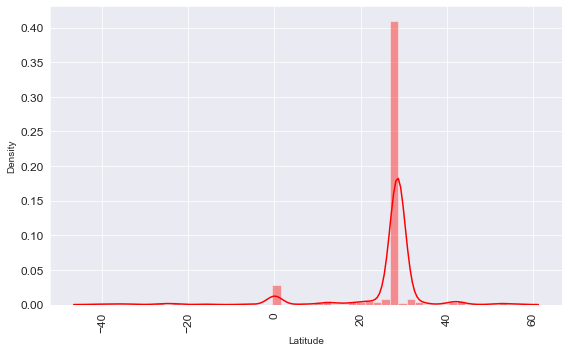

In [72]:
plt.figure(figsize=(8,5))
sns.distplot(df['Latitude'],color='r',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Tri-Modal) 3 Modes

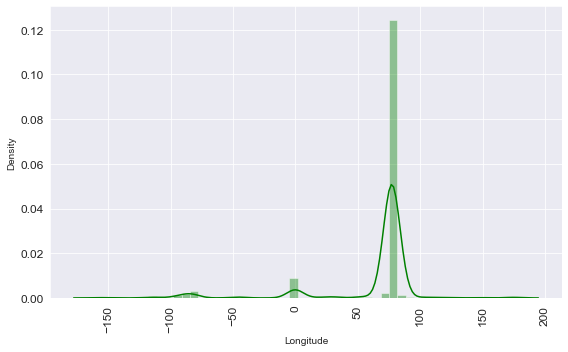

In [73]:
plt.figure(figsize=(8,5))
sns.distplot(df['Longitude'],color='g',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Tri-Modal) 3 Modes

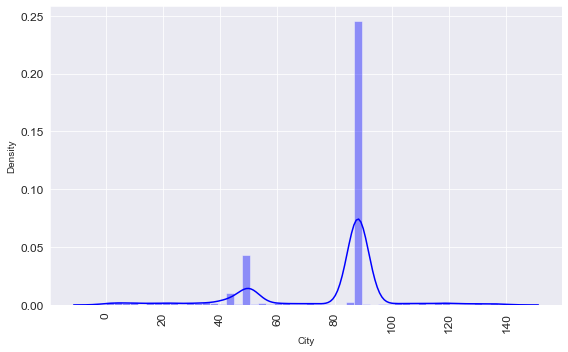

In [74]:
plt.figure(figsize=(8,5))
sns.distplot(df['City'],color='b',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Tri-Modal)

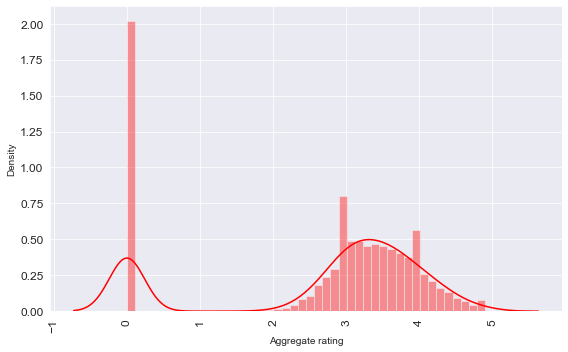

In [75]:
plt.figure(figsize=(8,5))
sns.distplot(df['Aggregate rating'],color='r',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Tri-Modal)

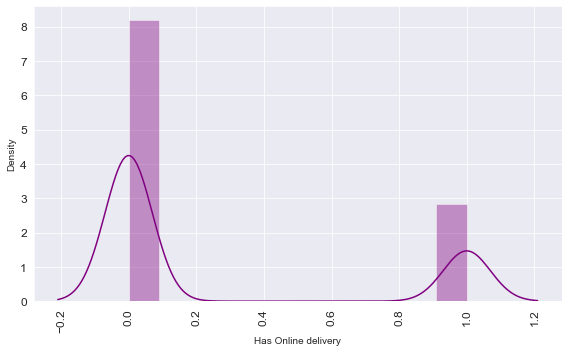

In [76]:
plt.figure(figsize=(8,5))
sns.distplot(df['Has Online delivery'],color='purple',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Tri-Modal)

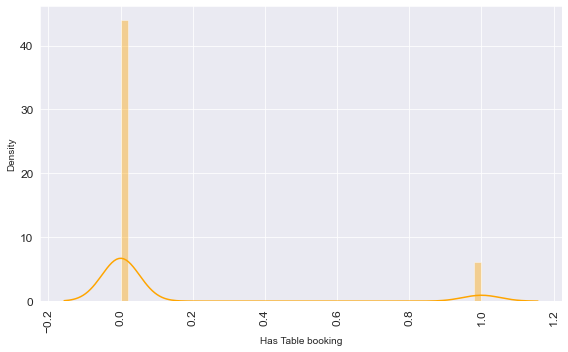

In [77]:
plt.figure(figsize=(8,5))
sns.distplot(df['Has Table booking'],color='orange',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Tri-Modal)

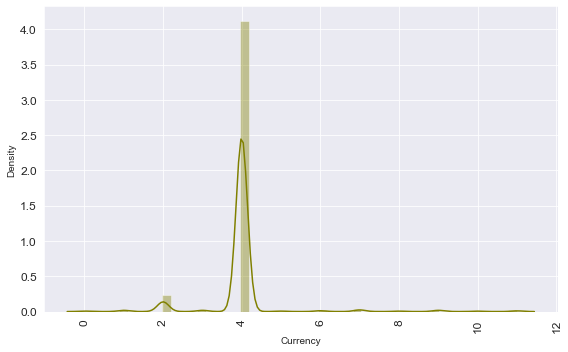

In [78]:
plt.figure(figsize=(8,5))
sns.distplot(df['Currency'],color='olive',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Multi-Modal)

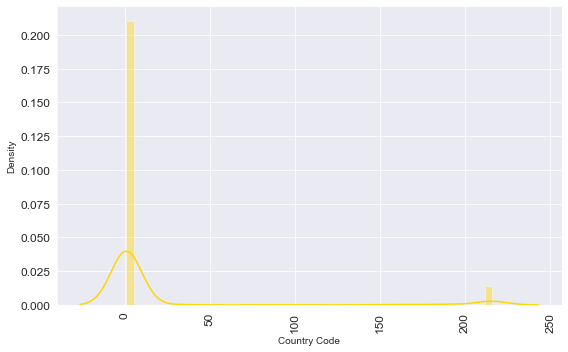

In [79]:
plt.figure(figsize=(8,5))
sns.distplot(df['Country Code'],color='gold',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

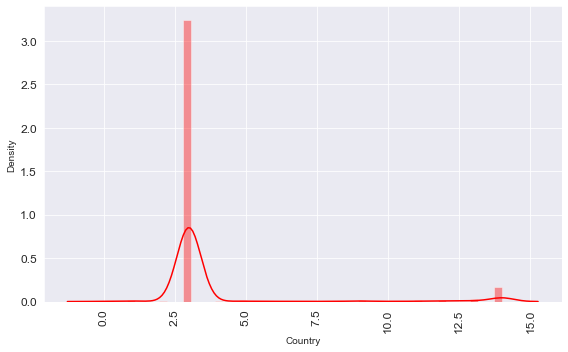

In [80]:
plt.figure(figsize=(8,5))
sns.distplot(df['Country'],color='r',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Bi-Modal)

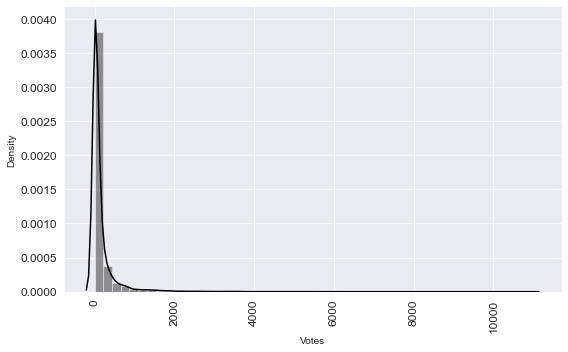

In [81]:
plt.figure(figsize=(8,5))
sns.distplot(df['Votes'],color='black',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

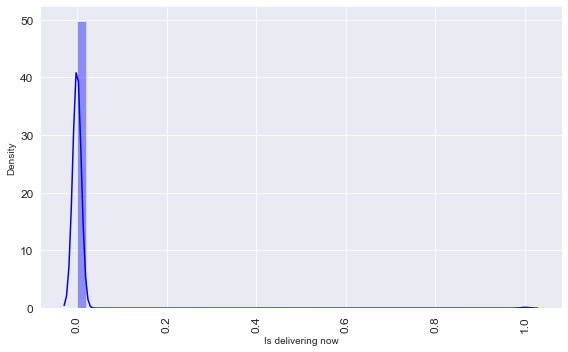

In [82]:
plt.figure(figsize=(8,5))
sns.distplot(df['Is delivering now'],color='blue',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

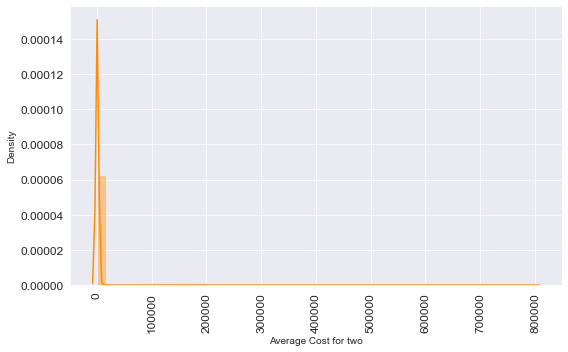

In [83]:
plt.figure(figsize=(8,5))
sns.distplot(df['Average Cost for two'],color='darkorange',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

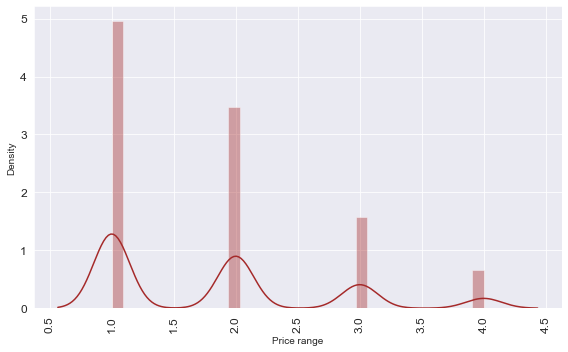

In [84]:
plt.figure(figsize=(8,5))
sns.distplot(df['Price range'],color='brown',kde=True)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.tight_layout()

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.(Multi-Modal)

## Framing Two data frams one for regression other for classification

In [85]:
df2=df.iloc[:,:]  # classification

In [86]:
df2.head(4)

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,73,171,172,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,162,73,593,601,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,162,75,308,314,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,162,75,862,875,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6


In [87]:
df3=df.copy() # regression

In [88]:
df3.head(4)

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,73,171,172,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,162,73,593,601,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,162,75,308,314,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,162,75,862,875,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6


# Data Cleansing

In [89]:
df2.corr()['Price range'].sort_values()

Latitude               -0.166688
Rating color           -0.140468
Locality               -0.114457
Locality Verbose       -0.112311
City                   -0.105759
Longitude              -0.078939
Cuisines               -0.005439
Is delivering now       0.010940
Average Cost for two    0.075083
Currency                0.075179
Has Online delivery     0.077918
Rating text             0.164242
Country                 0.178035
Country Code            0.243327
Votes                   0.309444
Aggregate rating        0.437944
Has Table booking       0.501925
Price range             1.000000
Name: Price range, dtype: float64

# Shows Negative Correlation  deleting the same

- Latitude : -0.166688

In [90]:
delete_class=pd.DataFrame(data={'col':['Latitude'],
                                'Value':[-0.166688],
                           'Outliers':['Yes'],
                                'Normalised':['YES']})
delete_class

,col,Value,Outliers,Normalised
0,Latitude,-0.166688,Yes,YES


In [91]:
df2.drop(['Latitude'],axis=1,inplace=True)

# Zscore [DF2]

In [92]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
z.head(3)

,Country Code,City,Locality,Locality Verbose,Longitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,2.531111,0.228533,1.542277,1.523332,1.372269,0.134114,0.006154,4.351046,2.692181,0.587547,0.059771,1.319803,1.407131,1.977859,0.465442,0.365202,0.853457
1,2.531111,0.228533,0.206201,0.230036,1.371945,0.237176,0.000049,4.351046,2.692181,0.587547,0.059771,1.319803,1.209281,1.977859,0.465442,1.009168,0.853457
2,2.531111,0.142317,1.108527,1.095248,1.372975,1.325776,0.173743,4.351046,2.692181,0.587547,0.059771,2.424090,1.143331,1.308053,1.895070,0.262911,0.853457


In [93]:
np.where(z>3)

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64),
 array([7, 7, 7, ..., 7, 0, 7], dtype=int64))

In [94]:
new_df=df2[(z<3).all(axis=1)]

In [95]:
new_df.head()

,Country Code,City,Locality,Locality Verbose,Longitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
143,14,12,93,94,115.984492,1270,20,2,0,0,0,2,3.2,2,0,21,0
144,14,15,111,112,146.685852,1619,20,2,0,0,0,2,4.6,0,1,237,0
269,14,37,282,288,153.137401,620,7,2,0,0,0,1,3.6,5,2,29,0
290,14,41,302,308,153.593331,331,20,2,0,0,0,2,4.1,1,5,56,0
292,14,45,328,334,152.877147,1793,30,2,0,0,0,3,3.5,5,2,37,0


# Data Loss Percentage

In [96]:
print("Old Data Frame ",df2.shape[0])
print("New_Data Frame ",new_df.shape[0])
print("Data Loss Percentage ",((df2.shape[0]-new_df.shape[0])/df2.shape[0])*100)

Old Data Frame  9551
New_Data Frame  8470
Data Loss Percentage  11.318186577321747


### Data Loss is more than 11 percentage, We won't procceed with Newdf

# Dividing Data Train and Test Seperation:

In [97]:
# y variable
y=df2.iloc[:,11] 

# x variable
x=df2.drop(['Price range'],axis=1)

In [98]:
y.head(4)

0    3
1    3
2    4
3    4
Name: Price range, dtype: int64

In [99]:
x.head(4)

,Country Code,City,Locality,Locality Verbose,Longitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,73,171,172,121.027535,920,1100,0,1,0,0,4.8,0,1,314,6
1,162,73,593,601,121.014101,1111,1200,0,1,0,0,4.5,0,1,591,6
2,162,75,308,314,121.056831,1671,4000,0,1,0,0,4.4,1,5,270,6
3,162,75,862,875,121.056475,1126,1500,0,0,0,0,4.9,0,1,365,6


In [100]:
print("Present Size of X Data ",x.shape,"And present Size of Y Data ",y.shape)

Present Size of X Data  (9551, 16) And present Size of Y Data  (9551,)


In [101]:
x.columns

Index(['Country Code', 'City', 'Locality', 'Locality Verbose', 'Longitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

# Removing Skewness

In [102]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [103]:
x=pd.DataFrame(data=x,columns=['Country Code', 'City', 'Locality', 'Locality Verbose', 'Longitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'])

In [104]:
x.skew()

Country Code             2.780362
City                    -0.203048
Locality                -0.304127
Locality Verbose        -0.279298
Longitude               -0.803832
Cuisines                -0.382737
Average Cost for two     0.142365
Currency                 0.448602
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Aggregate rating        -0.610806
Rating color            -0.103780
Rating text             -0.059959
Votes                   -0.004029
Country                 -1.341627
dtype: float64

In [105]:
x['Is delivering now']=np.log(x['Is delivering now']-1)
x['Has Online delivery']=np.log(x['Has Online delivery']-1)
x['Has Table booking']=np.log(x['Has Table booking']-1)
x['Country Code']=np.log(x['Country Code']-1)

In [106]:
x.skew()

Country Code           -5.312441
City                   -0.203048
Locality               -0.304127
Locality Verbose       -0.279298
Longitude              -0.803832
Cuisines               -0.382737
Average Cost for two    0.142365
Currency                0.448602
Has Table booking       0.000000
Has Online delivery     0.000000
Is delivering now       0.000000
Aggregate rating       -0.610806
Rating color           -0.103780
Rating text            -0.059959
Votes                  -0.004029
Country                -1.341627
dtype: float64

In [107]:
x.drop(['Country Code','Has Table booking','Has Online delivery','Is delivering now'],axis=1,inplace=True)

# Standard Scaler

In [121]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

x=ss.fit_transform(x)

In [122]:
x

array([[-0.39838037, -1.55745949, -1.55273606, ..., -0.22451093,
         1.1918848 ,  1.55649064],
       [-0.39838037, -0.18772526, -0.1961753 , ..., -0.22451093,
         1.5077858 ,  1.55649064],
       [-0.3030848 , -1.10146732, -1.08310221, ...,  1.50322837,
         1.11676465,  1.55649064],
       ...,
       [ 3.86046089, -0.31084394, -0.31640524, ...,  0.37685986,
         1.5638909 ,  2.62756967],
       [ 3.86046089, -0.31084394, -0.31640524, ...,  1.50322837,
         1.719424  ,  2.62756967],
       [ 3.86046089,  0.0539685 ,  0.0417627 , ...,  1.50322837,
         1.5077858 ,  2.62756967]])

In [123]:
print(" Mean Value ",round(x.mean(),2)," Standard Deviation ",round(x.std(),2))

 Mean Value  0.0  Standard Deviation  1.0


# Smote

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

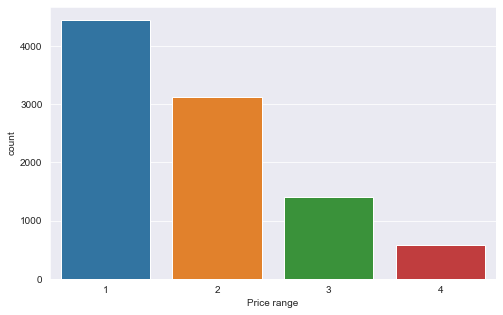

In [124]:
plt.figure(figsize=(8,5))
sns.countplot(x=y)
y.value_counts()

In [126]:
# calling imblearn library.
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

3    4444
4    4444
2    4444
1    4444
Name: Price range, dtype: int64

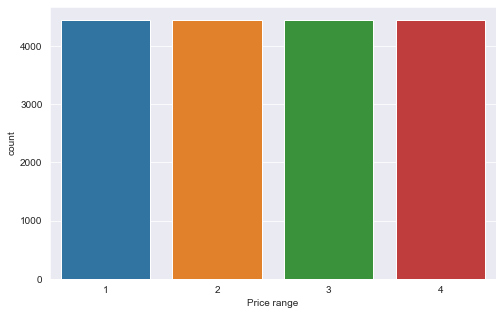

In [127]:
plt.figure(figsize=(8,5))
sns.countplot(x=y)
y.value_counts()

# Importing Library

In [128]:
# linear_model,train test and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Clssifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# cross Validation
from sklearn.model_selection import cross_val_score

# Ensamble
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# neural network
from sklearn.neural_network import MLPClassifier

# hyper paramter
from sklearn.model_selection import GridSearchCV


# Instances :
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
gnb=GaussianNB()
svc=SVC()
sgd=SGDClassifier()
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
mlp=MLPClassifier()

# Train Test

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [137]:
print("X_Train",x_train.shape,"X_Test",x_test.shape)

X_Train (14220, 12) X_Test (3556, 12)


In [138]:
print("Y_train",y_train.shape,"Y_test",y_test.shape)

Y_train (14220,) Y_test (3556,)


# Model 1- Decision Tree

In [139]:
#train and score
dtc.fit(x_train,y_train)
dtc_score=dtc.score(x_train,y_train)

#predict
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 1.0  Accuracy Test Score = 0.9808773903262092 

Training Confusion_Matrix 
 [[3575    0    0    0]
 [   0 3514    0    0]
 [   0    0 3543    0]
 [   0    0    0 3588]] Testing Confusion_Matrix 
 [[868   1   0   0]
 [  2 911  17   0]
 [  0  17 873  11]
 [  0   0  20 836]]
Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       869
           2       0.98      0.98      0.98       930
           3       0.96      0.97      0.96       901
           4       0.99      0.98      0.98       856

    accuracy                           0.98      3556
   macro avg       0.98      0.98      0.98      3556
weighted avg       0.98      0.98      0.98      3556



# Model Cross Validation

In [140]:
#train test Accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#Range finding cv Score
for i in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.8964896489648966 Training Score  1.0 Testing Score  0.9808773903262092
A cross-fold  3 CV_mean  0.9324980051673405 Training Score  1.0 Testing Score  0.9808773903262092
A cross-fold  4 CV_mean  0.9333370837083709 Training Score  1.0 Testing Score  0.9808773903262092
A cross-fold  5 CV_mean  0.9056111024096671 Training Score  1.0 Testing Score  0.9808773903262092
A cross-fold  6 CV_mean  0.9264682490759885 Training Score  1.0 Testing Score  0.9808773903262092
A cross-fold  7 CV_mean  0.9635501253560319 Training Score  1.0 Testing Score  0.9808773903262092
A cross-fold  8 CV_mean  0.9633775877587758 Training Score  1.0 Testing Score  0.9808773903262092
A cross-fold  9 CV_mean  0.9610235341681044 Training Score  1.0 Testing Score  0.9808773903262092


In [141]:
# accuracy score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#score and mean
cv_score =cross_val_score(dtc,x,y,cv=9)
cv_mean  =cv_score.mean()

# result
print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  9 CV_mean  0.9650718893956736 Training Score  1.0 Testing Score  0.9808773903262092


### Model Score

In [142]:
from sklearn.metrics import roc_auc_score
y_pred_proba=dtc.predict_proba(x_test)
y_pred_proba

roc_auc_score(y_test,y_pred_proba,multi_class='ovr')

0.9872961471068556

In [143]:
y_pred_proba

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [144]:
print("Decision Tree Model Score ", roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Decision Tree Model Score  0.9872961471068556


# Model2 :Kneighbors Classifier

In [146]:
# train and score
knc.fit(x_train,y_train)
knc_score=knc.score(x_train,y_train)

#predict
pred_train= knc.predict(x_train)
pred_test = knc.predict(x_test)

#result
print("Training Score",knc_score)
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"\n","Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Training Score 0.9454992967651196
Accuracy Training Score = 0.9454992967651196  Accuracy Test Score = 0.9001687289088864 

Training Confusion_Matrix 
 [[3315  236   22    2]
 [  93 3203  203   15]
 [   3   58 3387   95]
 [   0    1   47 3540]] 
 Testing Confusion_Matrix 
 [[773  92   4   0]
 [ 57 781  85   7]
 [  4  36 811  50]
 [  0   1  19 836]]
Classification Report 
               precision    recall  f1-score   support

           1       0.93      0.89      0.91       869
           2       0.86      0.84      0.85       930
           3       0.88      0.90      0.89       901
           4       0.94      0.98      0.96       856

    accuracy                           0.90      3556
   macro avg       0.90      0.90      0.90      3556
weighted avg       0.90      0.90      0.90      3556



In [147]:
#accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#range for cv 
for i in range(2,10):
    cv_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7328420342034203 Training Score  0.9454992967651196 Testing Score  0.9001687289088864
A cross-fold  3 CV_mean  0.7703684684954096 Training Score  0.9454992967651196 Testing Score  0.9001687289088864
A cross-fold  4 CV_mean  0.8126125112511251 Training Score  0.9454992967651196 Testing Score  0.9001687289088864
A cross-fold  5 CV_mean  0.8264046582784748 Training Score  0.9454992967651196 Testing Score  0.9001687289088864
A cross-fold  6 CV_mean  0.8314102986271753 Training Score  0.9454992967651196 Testing Score  0.9001687289088864
A cross-fold  7 CV_mean  0.8498637675213796 Training Score  0.9454992967651196 Testing Score  0.9001687289088864
A cross-fold  8 CV_mean  0.8528915391539154 Training Score  0.9454992967651196 Testing Score  0.9001687289088864
A cross-fold  9 CV_mean  0.8517765649111418 Training Score  0.9454992967651196 Testing Score  0.9001687289088864


### Selected Cross Fold-8 as cv score is close to Testing Score

In [148]:
#accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#cross val score(K_neighbors)
knc_cv_score=cross_val_score(knc,x,y,cv=8) # cv_score is near to training score
knc_mean=knc_cv_score.mean()

#predict result
print(" Cross Validation_mean ",knc_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

 Cross Validation_mean  0.8528915391539154 Training Score  0.9454992967651196 Testing Score  0.9001687289088864


### Model Score

In [159]:
from sklearn.metrics import roc_auc_score
y_pred_proba=knc.predict_proba(x_test)
y_pred_proba

roc_auc_score(y_test,y_pred_proba,multi_class='ovr')

0.9825450832356202

In [160]:
y_pred_proba

array([[1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0.2, 0.8, 0. ],
       ...,
       [0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. ],
       [0. , 0.4, 0.6, 0. ]])

In [161]:
print("KNeighbors Model Score ", roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

KNeighbors Model Score  0.9825450832356202


# Model 3: SVC (Support Vector Machine)

In [152]:
#train and score
svc.fit(x_train,y_train)
svc_score=svc.score(x_train,y_train)

# predict
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 0.9425457102672292  Accuracy Test Score = 0.9443194600674916 

Training Confusion_Matrix 
 [[3412  157    6    0]
 [  21 3284  202    7]
 [   0   86 3304  153]
 [   0    2  183 3403]] Testing Confusion_Matrix 
 [[834  34   1   0]
 [  3 871  55   1]
 [  0  26 824  51]
 [  0   0  27 829]]
Classification Report 
               precision    recall  f1-score   support

           1       1.00      0.96      0.98       869
           2       0.94      0.94      0.94       930
           3       0.91      0.91      0.91       901
           4       0.94      0.97      0.95       856

    accuracy                           0.94      3556
   macro avg       0.95      0.94      0.94      3556
weighted avg       0.94      0.94      0.94      3556



## Model Cross Validation

In [154]:
#score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val 
for i in range(2,5):
    cv_svc_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_svc_score.mean() 
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.8706683168316831 Training Score  0.9425457102672292 Testing Score  0.9443194600674916
A cross-fold  3 CV_mean  0.8964364053044274 Training Score  0.9425457102672292 Testing Score  0.9443194600674916
A cross-fold  4 CV_mean  0.9043091809180919 Training Score  0.9425457102672292 Testing Score  0.9443194600674916


### Selected Cross Fold-4 as cv score is close to Testing Score

In [155]:
#accuracy score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#cross val score
svc_cv_score=cross_val_score(svc,x,y,cv=4)
svc_mean=svc_cv_score.mean()

print(" CV_mean ",svc_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

 CV_mean  0.9043091809180919 Training Score  0.9425457102672292 Testing Score  0.9443194600674916


- Score prediction doesn't work for SVC Model graph

### Ensamble Technique

# Extra Trees Classifier

In [164]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()

# train and score
etc.fit(x_train,y_train)
etc_score=etc.score(x_train,y_train)

#predict
pred_train=etc.predict(x_train)
pred_test=etc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 1.0  Accuracy Test Score = 0.9797525309336333 

Training Confusion_Matrix 
 [[3575    0    0    0]
 [   0 3514    0    0]
 [   0    0 3543    0]
 [   0    0    0 3588]] Testing Confusion_Matrix 
 [[848  21   0   0]
 [  9 904  16   1]
 [  0   7 884  10]
 [  0   0   8 848]]
Classification Report 
               precision    recall  f1-score   support

           1       0.99      0.98      0.98       869
           2       0.97      0.97      0.97       930
           3       0.97      0.98      0.98       901
           4       0.99      0.99      0.99       856

    accuracy                           0.98      3556
   macro avg       0.98      0.98      0.98      3556
weighted avg       0.98      0.98      0.98      3556



## Model Cross Validation

In [166]:
from sklearn.model_selection import cross_val_score
#
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_etc_score=cross_val_score(etc,x,y,cv=i)
    cv_mean=cv_etc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.8445094509450946 Training Score  1.0 Testing Score  0.9797525309336333
A cross-fold  3 CV_mean  0.8409691967458001 Training Score  1.0 Testing Score  0.9797525309336333
A cross-fold  4 CV_mean  0.8810193519351935 Training Score  1.0 Testing Score  0.9797525309336333
A cross-fold  5 CV_mean  0.8936294672026757 Training Score  1.0 Testing Score  0.9797525309336333
A cross-fold  6 CV_mean  0.9115693067678653 Training Score  1.0 Testing Score  0.9797525309336333
A cross-fold  7 CV_mean  0.9195036840363446 Training Score  1.0 Testing Score  0.9797525309336333
A cross-fold  8 CV_mean  0.9246737173717372 Training Score  1.0 Testing Score  0.9797525309336333
A cross-fold  9 CV_mean  0.9276615020185973 Training Score  1.0 Testing Score  0.9797525309336333


### Slected Cross Fold 11 as cross val score is Close to training score

In [171]:
#etc_predict test

etc_test=etc.predict(x_test)

#cross val score
etc_cv_score=cross_val_score(etc,x,y,cv=18)
etc_mean=etc_cv_score.mean()

print(" CV_mean ",etc_mean,"Testing Accuracy Score ",accuracy_score(y_test,etc_test))

 CV_mean  0.9478019129474897 Testing Accuracy Score  0.9797525309336333


### Model Training Score

In [167]:
from sklearn.metrics import roc_auc_score

y_predict_proba=etc.predict_proba(x_test)
y_predict_proba

array([[0.99, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.01],
       [0.  , 0.1 , 0.82, 0.08],
       ...,
       [0.  , 0.  , 0.  , 1.  ],
       [0.01, 0.  , 0.05, 0.94],
       [0.  , 0.44, 0.52, 0.04]])

In [168]:
print("Model Extra Trees Classifier Train Score",roc_auc_score(y_test,y_predict_proba,multi_class='ovr'))

Model Extra Trees Classifier Train Score 0.9992272703411954


# MLP Classifier

In [169]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()

#train
mlp.fit(x_train,y_train)
mlp_score=mlp.score(x_train,y_train)

#predict
pred_train=mlp.predict(x_train)
pred_test=mlp.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9751054852320675  Accuracy Test Score = 0.9699100112485939 

Training Confusion_Matrix 
 [[3565   10    0    0]
 [  22 3439   52    1]
 [   0  103 3389   51]
 [   0    1  114 3473]] Testing Confusion_Matrix 
 [[867   2   0   0]
 [  7 903  19   1]
 [  0  38 849  14]
 [  0   0  26 830]]
Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       869
           2       0.96      0.97      0.96       930
           3       0.95      0.94      0.95       901
           4       0.98      0.97      0.98       856

    accuracy                           0.97      3556
   macro avg       0.97      0.97      0.97      3556
weighted avg       0.97      0.97      0.97      3556



# Model Cross Validation

In [170]:
from sklearn.model_selection import cross_val_score

train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,20):
    cv_mlp_score=cross_val_score(mlp,x,y,cv=i)
    cv_mean=cv_mlp_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.9229860486048604 Training Score  0.9751054852320675 Testing Score  0.9699100112485939
A cross-fold  3 CV_mean  0.9391897158247547 Training Score  0.9751054852320675 Testing Score  0.9699100112485939
A cross-fold  4 CV_mean  0.9401440144014401 Training Score  0.9751054852320675 Testing Score  0.9699100112485939
A cross-fold  5 CV_mean  0.9375067673502837 Training Score  0.9751054852320675 Testing Score  0.9699100112485939
A cross-fold  6 CV_mean  0.9502153463122224 Training Score  0.9751054852320675 Testing Score  0.9699100112485939
A cross-fold  7 CV_mean  0.9522993605712636 Training Score  0.9751054852320675 Testing Score  0.9699100112485939
A cross-fold  8 CV_mean  0.9538141314131413 Training Score  0.9751054852320675 Testing Score  0.9699100112485939
A cross-fold  9 CV_mean  0.9515704629961791 Training Score  0.9751054852320675 Testing Score  0.9699100112485939
A cross-fold  10 CV_mean  0.9537614424533457 Training Score  0.9751054852320675 Testing Score  0

## Selecting Cross Fold  16 as Training score is close to cross Val score 

In [173]:
from sklearn.model_selection import cross_val_score
#mlp_predict test
mlp_test=mlp.predict(x_test)

#cross val score
mlp_cv_score=cross_val_score(mlp,x,y,cv=16)
cv_mean=mlp_cv_score.mean()

print(" CV_mean ",cv_mean,"Testing Accuracy Score ",accuracy_score(y_test,mlp_test))

 CV_mean  0.9557268226822682 Testing Accuracy Score  0.9699100112485939


### AUC_ROC_Score

In [174]:
from sklearn.metrics import roc_auc_score
y_pred_proba=mlp.predict_proba(x_test)
y_pred_proba

array([[1.00000000e+00, 4.04019879e-10, 1.25142439e-16, 7.19594208e-24],
       [7.07926492e-10, 7.32693481e-02, 9.26263525e-01, 4.67126392e-04],
       [1.69736335e-23, 2.51526923e-02, 9.25997973e-01, 4.88493343e-02],
       ...,
       [4.32095720e-60, 1.84143022e-13, 2.74998368e-03, 9.97250016e-01],
       [4.65237483e-53, 3.54819080e-09, 1.47135728e-01, 8.52864268e-01],
       [1.44142831e-15, 7.27212390e-01, 2.72516930e-01, 2.70679760e-04]])

In [175]:
print("MLP Modal Score",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

MLP Modal Score 0.997715364827841


# Ada Boost Classifier

In [176]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

ada.fit(x_train,y_train)
ada_score=ada.score(x_train,y_train)

#predict
pred_train=ada.predict(x_train)
pred_test=ada.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.5717299578059072  Accuracy Test Score = 0.5801462317210349 

Training Confusion_Matrix 
 [[3452  119    4    0]
 [  79 3172  245   18]
 [   8 2818  521  196]
 [   0 2381  222  985]] Testing Confusion_Matrix 
 [[842  26   1   0]
 [ 23 848  58   1]
 [  1 700 148  52]
 [  0 566  65 225]]
Classification Report 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97       869
           2       0.40      0.91      0.55       930
           3       0.54      0.16      0.25       901
           4       0.81      0.26      0.40       856

    accuracy                           0.58      3556
   macro avg       0.68      0.58      0.54      3556
weighted avg       0.67      0.58      0.54      3556



## Model Cross Validation

In [177]:
from sklearn.model_selection import cross_val_score

#train and score for Ada Boost
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val for Ada Boost
for i in range(2,12):
    cv_ada_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=cv_ada_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.7628262826282628 Training Score  0.5717299578059072 Testing Score  0.5801462317210349
A cross-fold  3 CV_mean  0.6910417132444072 Training Score  0.5717299578059072 Testing Score  0.5801462317210349
A cross-fold  4 CV_mean  0.7233910891089109 Training Score  0.5717299578059072 Testing Score  0.5801462317210349
A cross-fold  5 CV_mean  0.676145086294593 Training Score  0.5717299578059072 Testing Score  0.5801462317210349
A cross-fold  6 CV_mean  0.73722971946983 Training Score  0.5717299578059072 Testing Score  0.5801462317210349
A cross-fold  7 CV_mean  0.7480880491553366 Training Score  0.5717299578059072 Testing Score  0.5801462317210349
A cross-fold  8 CV_mean  0.7335733573357336 Training Score  0.5717299578059072 Testing Score  0.5801462317210349
A cross-fold  9 CV_mean  0.7333080795139423 Training Score  0.5717299578059072 Testing Score  0.5801462317210349
A cross-fold  10 CV_mean  0.7311549020638036 Training Score  0.5717299578059072 Testing Score  0.58

## Selecting Cross Fold  12 as Training score is close to cross Val score 

In [178]:
#Model_predict test
ada_test=ada.predict(x_test)

#cross val score
ada_cv_score=cross_val_score(ada,x,y,cv=12) #accuracy score is low 
ada_mean=ada_cv_score.mean()

print(" CV_mean ",ada_mean,"Testing Accuracy Score ",accuracy_score(y_test,ada_test))

 CV_mean  0.7549522167578956 Testing Accuracy Score  0.5801462317210349


### Model Score

In [179]:
from sklearn.metrics import roc_auc_score
y_pred_proba=ada.predict_proba(x_test)
y_pred_proba

array([[0.40668867, 0.3536323 , 0.10937634, 0.13030269],
       [0.022515  , 0.29552434, 0.3462488 , 0.33571186],
       [0.02163914, 0.30566242, 0.3528687 , 0.31982974],
       ...,
       [0.01369116, 0.36805948, 0.34062969, 0.27761967],
       [0.0148574 , 0.3722422 , 0.33517818, 0.27772222],
       [0.02690275, 0.38941966, 0.32045542, 0.26322217]])

In [180]:
print("Model Ada Boost Classifier",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model Ada Boost Classifier 0.902491069398568


# Random Forest Classifier

In [181]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)
      
#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 1.0  Accuracy Test Score = 0.9865016872890888 

Training Confusion_Matrix 
 [[3575    0    0    0]
 [   0 3514    0    0]
 [   0    0 3543    0]
 [   0    0    0 3588]] Testing Confusion_Matrix 
 [[867   2   0   0]
 [  8 914   7   1]
 [  0  14 878   9]
 [  0   0   7 849]]
Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       869
           2       0.98      0.98      0.98       930
           3       0.98      0.97      0.98       901
           4       0.99      0.99      0.99       856

    accuracy                           0.99      3556
   macro avg       0.99      0.99      0.99      3556
weighted avg       0.99      0.99      0.99      3556



## Model Cross Validation

In [182]:
from sklearn.model_selection import cross_val_score

#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,12):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.9119599459945995 Training Score  1.0 Testing Score  0.9865016872890888
A cross-fold  3 CV_mean  0.934636029074953 Training Score  1.0 Testing Score  0.9865016872890888
A cross-fold  4 CV_mean  0.9382875787578757 Training Score  1.0 Testing Score  0.9865016872890888
A cross-fold  5 CV_mean  0.9380165770417939 Training Score  1.0 Testing Score  0.9865016872890888
A cross-fold  6 CV_mean  0.9744037213714436 Training Score  1.0 Testing Score  0.9865016872890888
A cross-fold  7 CV_mean  0.9753058806798421 Training Score  1.0 Testing Score  0.9865016872890888
A cross-fold  8 CV_mean  0.9754725472547254 Training Score  1.0 Testing Score  0.9865016872890888
A cross-fold  9 CV_mean  0.9743524260179824 Training Score  1.0 Testing Score  0.9865016872890888
A cross-fold  10 CV_mean  0.9753047470079184 Training Score  1.0 Testing Score  0.9865016872890888
A cross-fold  11 CV_mean  0.9748537353735375 Training Score  1.0 Testing Score  0.9865016872890888


## Selecting Cross Fold  12 as Training score is close to cross Val score 

In [183]:
#rfc_predict test
rfc_test=rfc.predict(x_test)

# model cross val score
rfc_cv_score=cross_val_score(rfc,x,y,cv=12) #accuracy would increase with increase in fold
rfc_mean=rfc_cv_score.mean()# mean value

print(" CV_mean ",rfc_mean,"Testing Accuracy Score ",accuracy_score(y_test,rfc_test))

 CV_mean  0.9754212755785306 Testing Accuracy Score  0.9865016872890888


### Model Graph

In [184]:
from sklearn.metrics import roc_auc_score
y_pred_proba=rfc.predict_proba(x_test)
y_pred_proba

array([[1.  , 0.  , 0.  , 0.  ],
       [0.07, 0.05, 0.85, 0.03],
       [0.  , 0.02, 0.88, 0.1 ],
       ...,
       [0.  , 0.  , 0.02, 0.98],
       [0.  , 0.02, 0.07, 0.91],
       [0.03, 0.71, 0.26, 0.  ]])

In [185]:
print("Model Random Forest Classifier",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model Random Forest Classifier 0.9996875587302401


# Gradient Boost

In [186]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

#train and score gradient Boosting Classifier
gbc.fit(x_train,y_train)
gbc_score=gbc.score(x_train,y_train)

#predict Gradient Boosting Classifier
pred_train=gbc.predict(x_train)
pred_test=gbc.predict(x_test)

#result gradient Boosting classifier
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9812939521800281  Accuracy Test Score = 0.9730033745781778 

Training Confusion_Matrix 
 [[3572    3    0    0]
 [  19 3455   37    3]
 [   0   64 3425   54]
 [   0    0   86 3502]] Testing Confusion_Matrix 
 [[868   1   0   0]
 [  8 908  12   2]
 [  0  30 850  21]
 [  0   0  22 834]]
Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       869
           2       0.97      0.98      0.97       930
           3       0.96      0.94      0.95       901
           4       0.97      0.97      0.97       856

    accuracy                           0.97      3556
   macro avg       0.97      0.97      0.97      3556
weighted avg       0.97      0.97      0.97      3556



## Model Cross Validation

In [187]:
from sklearn.model_selection import cross_val_score

#predict model 
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,12):
    cv_gbc_score=cross_val_score(gbc,x,y,cv=i)
    cv_mean=cv_gbc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.9564018901890189 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  3 CV_mean  0.9597782685944275 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  4 CV_mean  0.9613523852385238 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  5 CV_mean  0.958036020813854 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  6 CV_mean  0.9600019073866911 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  7 CV_mean  0.9623668299831959 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  8 CV_mean  0.9621962196219622 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  9 CV_mean  0.9614688782976591 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  10 CV_mean  0.9624783114828711 Training Score  0.9812939521800281 Testing Score  0.

## Selecting Cross Fold  12 as Training score is close to cross Val score 

In [189]:
#dtc_predict test
gbc_test=gbc.predict(x_test)

#cross val score
gbc_cv_score=cross_val_score(gbc,x,y,cv=12)
gbc_mean=gbc_cv_score.mean()

print(" CV_mean ",gbc_mean,"Testing Accuracy Score ",accuracy_score(y_test,gbc_test))

 CV_mean  0.9614692462297212 Testing Accuracy Score  0.9730033745781778


### Model Graph

In [190]:
from sklearn.metrics import roc_auc_score
y_pred_proba = gbc.predict_proba(x_test)
y_pred_proba

array([[9.98919228e-01, 7.17101876e-04, 2.65913302e-04, 9.77567970e-05],
       [2.33919632e-03, 2.56699571e-02, 9.60341397e-01, 1.16494497e-02],
       [5.76004251e-03, 1.87952373e-02, 5.48517347e-01, 4.26927373e-01],
       ...,
       [1.74447593e-04, 1.24095893e-03, 8.42153132e-03, 9.90163062e-01],
       [1.29099962e-04, 1.35812747e-03, 9.38923068e-03, 9.89123542e-01],
       [1.04185898e-03, 7.42806286e-01, 2.44874756e-01, 1.12770990e-02]])

In [191]:
print("Model Gradient Booster Classifier ",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model Gradient Booster Classifier  0.9988595730658457


## SGD Classifier

In [192]:
from sklearn.linear_model import SGDClassifier
sgc=SGDClassifier()

#train and score gradient Boosting Classifier
sgc.fit(x_train,y_train)
sgc_score=sgc.score(x_train,y_train)

#predict Gradient Boosting Classifier
pred_train=sgc.predict(x_train)
pred_test=sgc.predict(x_test)

#result gradient Boosting classifier
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))


Accuracy Training Score = 0.5360759493670886  Accuracy Test Score = 0.5236220472440944 

Training Confusion_Matrix 
 [[3379   16  171    9]
 [1597  141 1280  496]
 [ 157  187 1383 1816]
 [ 246  133  489 2720]] Testing Confusion_Matrix 
 [[826   1  41   1]
 [444  47 301 138]
 [ 52  46 334 469]
 [ 44  38 119 655]]
Classification Report 
               precision    recall  f1-score   support

           1       0.60      0.95      0.74       869
           2       0.36      0.05      0.09       930
           3       0.42      0.37      0.39       901
           4       0.52      0.77      0.62       856

    accuracy                           0.52      3556
   macro avg       0.47      0.53      0.46      3556
weighted avg       0.47      0.52      0.45      3556



## Model Cross Validation

In [195]:
from sklearn.model_selection import cross_val_score

#predict model 
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_sgc_score=cross_val_score(sgc,x,y,cv=i)
    cv_mean=cv_sgc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.59000900090009 Training Score  0.5360759493670886 Testing Score  0.5236220472440944
A cross-fold  3 CV_mean  0.5526014564058456 Training Score  0.5360759493670886 Testing Score  0.5236220472440944
A cross-fold  4 CV_mean  0.5829207920792079 Training Score  0.5360759493670886 Testing Score  0.5236220472440944
A cross-fold  5 CV_mean  0.5749329276878365 Training Score  0.5360759493670886 Testing Score  0.5236220472440944
A cross-fold  6 CV_mean  0.5633453109013721 Training Score  0.5360759493670886 Testing Score  0.5236220472440944
A cross-fold  7 CV_mean  0.5628356469226301 Training Score  0.5360759493670886 Testing Score  0.5236220472440944
A cross-fold  8 CV_mean  0.5554680468046804 Training Score  0.5360759493670886 Testing Score  0.5236220472440944
A cross-fold  9 CV_mean  0.5533304862285542 Training Score  0.5360759493670886 Testing Score  0.5236220472440944


## Selecting Cross Fold  12 as Training score is close to cross Val score 

In [198]:
#dtc_predict test
sgc_test=sgc.predict(x_test)

#cross val score
sgc_cv_score=cross_val_score(sgc,x,y,cv=12)
sgc_mean=sgc_cv_score.mean()

print(" CV_mean ",sgc_mean,"Testing Accuracy Score ",accuracy_score(y_test,sgc_test))

 CV_mean  0.5703227916481762 Testing Accuracy Score  0.5236220472440944


### Model Graph

- Model not working Well

# Using Best parameter (Hyper-Parameter)

- Random Forest Classifier
- Gradiant Booster Classifier 

* selected as both Training and testing are close to each other.
* accuracy along cv is better then other models.
- ROC score is better

# Random Forest Classifier

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()

parameter={'criterion':['entropy','gini', 'log_loss'],
           'max_features':['None','sqrt', 'log2'],
          'class_weight':['balanced', 'balanced_subsample'],
          'random_state':[42],
          'ccp_alpha':[0.0000001],
          'min_impurity_decrease':[0.00000001]}

gsv=GridSearchCV(rf,parameter,cv=16)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Params ",gsv.best_params_,)

Best Score  0.9877639081010143 Best Params  {'ccp_alpha': 1e-07, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'min_impurity_decrease': 1e-08, 'random_state': 42}


In [208]:
#import lib with best parameters
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(class_weight='balanced', criterion='entropy',max_features='sqrt',min_samples_split=2,min_samples_leaf=1,
                          min_impurity_decrease=0.0000001,n_jobs=5)

#train model
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Testing Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 1.0  Accuracy Test Score = 0.9884701912260967 

Training Confusion_Matrix 
 [[3575    0    0    0]
 [   0 3514    0    0]
 [   0    0 3543    0]
 [   0    0    0 3588]] Testing Confusion_Matrix 
 [[868   1   0   0]
 [  5 918   7   0]
 [  0  12 880   9]
 [  0   0   7 849]]
Classification Testing Report 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       869
           2       0.99      0.99      0.99       930
           3       0.98      0.98      0.98       901
           4       0.99      0.99      0.99       856

    accuracy                           0.99      3556
   macro avg       0.99      0.99      0.99      3556
weighted avg       0.99      0.99      0.99      3556



## Model Cross Validation

In [209]:
#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,18):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.9242799279927993 Training Score  1.0 Testing Score  0.9884701912260967
A cross-fold  3 CV_mean  0.9570233631573276 Training Score  1.0 Testing Score  0.9884701912260967
A cross-fold  4 CV_mean  0.9506638163816381 Training Score  1.0 Testing Score  0.9884701912260967
A cross-fold  5 CV_mean  0.9388604114359123 Training Score  1.0 Testing Score  0.9884701912260967
A cross-fold  6 CV_mean  0.9691144833849604 Training Score  1.0 Testing Score  0.9884701912260967
A cross-fold  7 CV_mean  0.9743494179218146 Training Score  1.0 Testing Score  0.9884701912260967
A cross-fold  8 CV_mean  0.9746287128712872 Training Score  1.0 Testing Score  0.9884701912260967
A cross-fold  9 CV_mean  0.9767146403821952 Training Score  1.0 Testing Score  0.9884701912260967
A cross-fold  10 CV_mean  0.9767673174224072 Training Score  1.0 Testing Score  0.9884701912260967
A cross-fold  11 CV_mean  0.9752475247524753 Training Score  1.0 Testing Score  0.9884701912260967
A cross-fold  12 C

## Selecting Cross Fold  10 as Training score is close to cross Val score 

In [210]:
# Cross val score(Random Forest)
rfc_cv_score=cross_val_score(rfc,x,y,cv=10)#cv score would increase with cv increase
rfc_mean=rfc_cv_score.mean()

print(" CV_Score ",rfc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_Score  0.9755300353916085 Testing Accuracy Score  0.9884701912260967


### Model Graph

In [211]:
from sklearn.metrics import roc_auc_score
y_pred_proba = rfc.predict_proba(x_test)
y_pred_proba

array([[1.  , 0.  , 0.  , 0.  ],
       [0.08, 0.05, 0.87, 0.  ],
       [0.  , 0.02, 0.85, 0.13],
       ...,
       [0.  , 0.  , 0.  , 1.  ],
       [0.01, 0.01, 0.09, 0.89],
       [0.02, 0.72, 0.26, 0.  ]])

In [212]:
print("Model  Random Forest Classifier ",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model  Random Forest Classifier  0.9996828084232416


<AxesSubplot:>

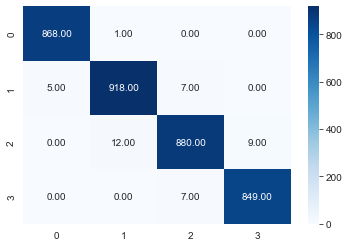

In [217]:
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True,cmap='Blues',fmt='0.2f')

# Model 2: By Hyper parameter(GradientBoostingClassifier)

In [224]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbc=GradientBoostingClassifier()

parameter={'loss':['log_loss','deviance','exponential'],
           'criterion':['friedman_mse','squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2']}

gsv=GridSearchCV(gbc,parameter)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Params ",gsv.best_params_,)

Best Score  0.9703938115330519 Best Params  {'criterion': 'mse', 'loss': 'deviance', 'max_features': 'auto'}


In [226]:
#import lib with best parameters
gbc=GradientBoostingClassifier(loss='deviance',criterion='mse',max_features='auto')

#train model
gbc.fit(x_train,y_train)
gbc_score=rfc.score(x_train,y_train)

#predict
pred_train1=gbc.predict(x_train)
pred_test1=gbc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train1)," Accuracy Test Score =",accuracy_score(y_test,pred_test1),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train1),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test1))
print("Classification Testing Report \n",classification_report(y_test,pred_test1))

Accuracy Training Score = 0.9812939521800281  Accuracy Test Score = 0.9730033745781778 

Training Confusion_Matrix 
 [[3572    3    0    0]
 [  19 3455   37    3]
 [   0   64 3425   54]
 [   0    0   86 3502]] Testing Confusion_Matrix 
 [[868   1   0   0]
 [  8 908  12   2]
 [  0  30 850  21]
 [  0   0  22 834]]
Classification Testing Report 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       869
           2       0.97      0.98      0.97       930
           3       0.96      0.94      0.95       901
           4       0.97      0.97      0.97       856

    accuracy                           0.97      3556
   macro avg       0.97      0.97      0.97      3556
weighted avg       0.97      0.97      0.97      3556



## Model Cross Validation

In [227]:
#train and score
train_accuracy=accuracy_score(y_train,pred_train1)
test_accuracy=accuracy_score(y_test,pred_test1)

#cross val
for i in range(2,18):
    cv_gbc_score=cross_val_score(gbc,x,y,cv=i)
    cv_mean=cv_gbc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.9560643564356436 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  3 CV_mean  0.9598345178913111 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  4 CV_mean  0.9614086408640864 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  5 CV_mean  0.9584297374220627 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  6 CV_mean  0.9601706552773424 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  7 CV_mean  0.9623668299831959 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  8 CV_mean  0.9620837083708371 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  9 CV_mean  0.9613564176588826 Training Score  0.9812939521800281 Testing Score  0.9730033745781778
A cross-fold  10 CV_mean  0.9624220685132423 Training Score  0.9812939521800281 Testing Score  0

## Selecting Cross Fold 10 as Training score is close to cross Val score 

In [228]:
# Cross val score(Random Forest)
gbc_cv_score=cross_val_score(gbc,x,y,cv=10)#cv score would increase with cv increase
gbc_mean=gbc_cv_score.mean()

print(" CV_Score ",gbc_mean,"Testing Accuracy Score ",test_accuracy)

 CV_Score  0.9624783114828711 Testing Accuracy Score  0.9730033745781778


### Model Graph

In [229]:
from sklearn.metrics import roc_auc_score
y_pred_proba = gbc.predict_proba(x_test)
y_pred_proba

array([[9.98919228e-01, 7.17101876e-04, 2.65913302e-04, 9.77567970e-05],
       [2.33919632e-03, 2.56699571e-02, 9.60341397e-01, 1.16494497e-02],
       [5.76004251e-03, 1.87952373e-02, 5.48517347e-01, 4.26927373e-01],
       ...,
       [1.74447593e-04, 1.24095893e-03, 8.42153132e-03, 9.90163062e-01],
       [1.29099962e-04, 1.35812747e-03, 9.38923068e-03, 9.89123542e-01],
       [1.04185898e-03, 7.42806286e-01, 2.44874756e-01, 1.12770990e-02]])

In [232]:
print("Model  Gradient Boosting Classifier ",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model  Gradient Boosting Classifier  0.9988601842313523


<AxesSubplot:>

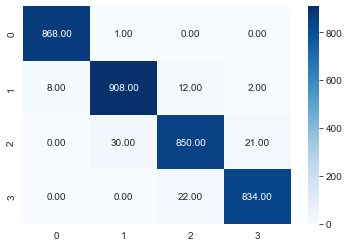

In [233]:
sns.heatmap(confusion_matrix(y_test,pred_test1),annot=True,cmap='Blues',fmt='0.2f')

# Saving Model

- Both the Models are working at Best CV_Score.

### Gradient Boosting Classifier - 0.9988601842313523
## Random Forest Classifier      - 0.9996828084232416

- Selecting Random Forest Classifier Showing, Testing accuracy score and Training score is close to each other.
- CV_Score is close to testing score.
- CV score increased Present CV_Score at 100 percentage got increased after Hyperparameter.

In [234]:
import pickle
pickle.dump(rfc,open('zormato_price.pkl','wb'))

In [235]:
# Loading Model Model
import pickle
loaded_model =pickle.load(open('zormato_price.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.84701912260967


In [236]:
df=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test1[:]],index=["Predicted","Original"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555
Predicted,1,3,3,2,2,1,3,2,4,3,1,4,2,1,2,4,3,3,1,4,4,2,2,2,3,2,2,1,1,1,1,4,2,3,3,2,4,4,1,2,2,3,4,1,3,2,3,2,1,2,3,4,2,2,1,1,4,1,1,3,2,4,4,1,1,3,3,2,1,4,3,4,4,4,4,1,4,4,2,3,4,3,2,3,2,4,2,3,4,1,2,3,1,3,1,4,2,2,4,1,...,3,3,3,4,2,1,4,3,4,3,3,4,3,1,2,1,3,2,2,2,4,4,4,3,4,3,3,3,2,4,3,3,1,4,4,3,3,1,2,2,2,2,2,1,1,4,1,4,2,1,2,3,4,3,3,3,4,1,3,1,3,1,3,4,4,3,1,4,1,3,2,4,1,2,3,1,2,1,3,2,3,4,3,4,4,3,1,4,3,3,2,1,4,4,2,3,1,4,4,2
Original,1,3,3,2,2,1,3,2,4,3,1,4,2,1,2,4,3,3,1,4,4,2,2,2,3,2,2,1,1,1,1,4,2,3,3,2,4,4,1,2,2,3,4,1,3,2,3,2,1,2,3,4,2,2,1,1,3,1,1,3,2,4,4,1,1,3,3,2,1,4,3,4,4,4,4,1,4,4,2,3,4,3,2,3,2,4,2,3,4,1,2,3,1,3,1,4,2,2,4,1,...,3,3,3,4,2,1,4,3,4,3,3,4,3,1,2,1,3,2,2,2,4,4,4,3,4,3,3,3,2,4,3,3,1,4,4,3,3,1,2,2,2,2,2,1,1,4,1,4,2,1,2,3,4,3,3,3,4,1,3,1,3,1,3,4,4,3,1,4,1,3,2,4,1,2,3,1,2,1,3,2,3,4,3,4,4,3,1,4,3,3,2,1,4,4,3,3,1,4,4,2


## Regression Model

In [108]:
df3.head(4)

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,73,171,172,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,162,73,593,601,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,162,75,308,314,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,162,75,862,875,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6


In [109]:
print(round(df3.corr()['Average Cost for two'].sort_values(),2))

Latitude               -0.11
Rating color           -0.05
City                   -0.03
Has Online delivery    -0.02
Locality               -0.01
Locality Verbose       -0.01
Country                -0.00
Is delivering now      -0.00
Cuisines                0.01
Has Table booking       0.01
Rating text             0.03
Country Code            0.04
Currency                0.05
Longitude               0.05
Aggregate rating        0.05
Votes                   0.07
Price range             0.08
Average Cost for two    1.00
Name: Average Cost for two, dtype: float64


# Deleting Columns

- Latitude               -0.11
- Country                -0.00
- Is delivering now      -0.00

In [110]:
delete=pd.DataFrame(data={'Columns':['Latitude','Country','Is delivering now'],"Values":[ -0.11,-0.00,-0.00],
                         'Outliers':['Yes','Yes','No'],
                         'Normalised':['No','No','No']})
delete

,Columns,Values,Outliers,Normalised
0,Latitude,-0.11,Yes,No
1,Country,-0.00,Yes,No
2,Is delivering now,-0.00,No,No


In [111]:
df3.drop(['Latitude','Country','Is delivering now'],axis=1,inplace=True)

In [112]:
df3.head()

,Country Code,City,Locality,Locality Verbose,Longitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,73,171,172,121.027535,920,1100,0,1,0,3,4.8,0,1,314
1,162,73,593,601,121.014101,1111,1200,0,1,0,3,4.5,0,1,591
2,162,75,308,314,121.056831,1671,4000,0,1,0,4,4.4,1,5,270
3,162,75,862,875,121.056475,1126,1500,0,0,0,4,4.9,0,1,365
4,162,75,862,875,121.057508,1122,1500,0,1,0,4,4.8,0,1,229


# Zscore

In [113]:
from scipy.stats import zscore
z=np.abs(zscore(df3))
z.head(4)

,Country Code,City,Locality,Locality Verbose,Longitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,2.531111,0.228533,1.542277,1.523332,1.372269,0.134114,0.006154,4.351046,2.692181,0.587547,1.319803,1.407131,1.977859,0.465442,0.365202
1,2.531111,0.228533,0.206201,0.230036,1.371945,0.237176,0.000049,4.351046,2.692181,0.587547,1.319803,1.209281,1.977859,0.465442,1.009168
2,2.531111,0.142317,1.108527,1.095248,1.372975,1.325776,0.173743,4.351046,2.692181,0.587547,2.424090,1.143331,1.308053,1.895070,0.262911
3,2.531111,0.142317,0.645468,0.595986,1.372966,0.266335,0.018659,4.351046,0.371446,0.587547,2.424090,1.473081,1.977859,0.465442,0.483766


In [114]:
np.where(z>3)

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64),
 array([7, 7, 7, ..., 7, 0, 7], dtype=int64))

In [115]:
z.iloc[0,7]

4.351045700874271

In [116]:
new_df1=df3[(z<3).all(axis=1)]

In [117]:
new_df1.head(5)

,Country Code,City,Locality,Locality Verbose,Longitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
143,14,12,93,94,115.984492,1270,20,2,0,0,2,3.2,2,0,21
144,14,15,111,112,146.685852,1619,20,2,0,0,2,4.6,0,1,237
269,14,37,282,288,153.137401,620,7,2,0,0,1,3.6,5,2,29
290,14,41,302,308,153.593331,331,20,2,0,0,2,4.1,1,5,56
292,14,45,328,334,152.877147,1793,30,2,0,0,3,3.5,5,2,37


# Data Loss Percentage

In [118]:
print("Old Data Frame ",df3.shape[0])
print("New_Data Frame ",new_df1.shape[0])
print("Data Loss Percentage ",((df3.shape[0]-new_df1.shape[0])/df3.shape[0])*100)

Old Data Frame  9551
New_Data Frame  8504
Data Loss Percentage  10.96220291068998


### Data Loss is Exceeding 10 percentage so I would use old df3

In [252]:
 # y variable
y=df3.iloc[:,6] 

# x variable
x=df3.drop(['Average Cost for two'],axis=1)
x.head(4)

,Country Code,City,Locality,Locality Verbose,Longitude,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,73,171,172,121.027535,920,0,1,0,3,4.8,0,1,314
1,162,73,593,601,121.014101,1111,0,1,0,3,4.5,0,1,591
2,162,75,308,314,121.056831,1671,0,1,0,4,4.4,1,5,270
3,162,75,862,875,121.056475,1126,0,0,0,4,4.9,0,1,365


In [253]:
y

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9551, dtype: int64

In [254]:
print("Present Size of X1 Data ",x.shape,"And present Size of Y1 Data ",y.shape)

Present Size of X1 Data  (9551, 14) And present Size of Y1 Data  (9551,)


In [255]:
x.columns

Index(['Country Code', 'City', 'Locality', 'Locality Verbose', 'Longitude',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Removing Skewness

In [256]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

x=pt.fit_transform(x)

In [257]:
x=pd.DataFrame(data=x,columns=['Country Code', 'City', 'Locality', 'Locality Verbose', 'Longitude',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'])
x.head(5)

,Country Code,City,Locality,Locality Verbose,Longitude,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3.103272,-0.398380,-1.557459,-1.552736,2.498033,-0.097945,-6.310872,2.692181,-0.587547,1.284171,1.833264,-2.210060,-0.224511,1.191885
1,3.103272,-0.398380,-0.187725,-0.196175,2.497306,0.263486,-6.310872,2.692181,-0.587547,1.284171,1.506121,-2.210060,-0.224511,1.507786
2,3.103272,-0.303085,-1.101467,-1.083102,2.499617,1.288795,-6.310872,2.692181,-0.587547,1.706541,1.400030,-1.345107,1.503228,1.116765
3,3.103272,-0.303085,0.649805,0.606966,2.499598,0.291575,-6.310872,-0.371446,-0.587547,1.706541,1.945248,-2.210060,-0.224511,1.266889
4,3.103272,-0.303085,0.649805,0.606966,2.499653,0.284088,-6.310872,2.692181,-0.587547,1.706541,1.833264,-2.210060,-0.224511,1.034953


In [258]:
x.skew()

Country Code           2.780362
City                  -0.203048
Locality              -0.304127
Locality Verbose      -0.279298
Longitude             -0.803832
Cuisines              -0.382737
Currency               0.448602
Has Table booking      2.321100
Has Online delivery    1.114620
Price range            0.182963
Aggregate rating      -0.610806
Rating color          -0.103780
Rating text           -0.059959
Votes                 -0.004029
dtype: float64

In [259]:
x.drop(['Country Code','Has Table booking','Has Online delivery'],axis=1,inplace=True)

# Standard Scaler (Standardization)

In [260]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [261]:
x

array([[-0.39838037, -1.55745949, -1.55273606, ..., -2.21005957,
        -0.22451093,  1.1918848 ],
       [-0.39838037, -0.18772526, -0.1961753 , ..., -2.21005957,
        -0.22451093,  1.5077858 ],
       [-0.3030848 , -1.10146732, -1.08310221, ..., -1.34510712,
         1.50322837,  1.11676465],
       ...,
       [ 3.86046089, -0.31084394, -0.31640524, ...,  1.32362429,
         0.37685986,  1.5638909 ],
       [ 3.86046089, -0.31084394, -0.31640524, ..., -1.34510712,
         1.50322837,  1.719424  ],
       [ 3.86046089,  0.0539685 ,  0.0417627 , ..., -1.34510712,
         1.50322837,  1.5077858 ]])

In [262]:
print("Mean ",round(x.mean()))
print("Standard Deviation ",round(x.std()))

Mean  0
Standard Deviation  1


In [263]:
x=pd.DataFrame(data=x,columns=['City', 'Locality', 'Locality Verbose', 'Longitude',
       'Cuisines', 'Currency',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'])

# Checking Multicolinearity

In [264]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variable']=x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif
calc_vif(x)

,Variable,VIF Factors
0,City,1.037214
1,Locality,1703.490108
2,Locality Verbose,1702.867357
3,Longitude,1.099474
4,Cuisines,1.037775
5,Currency,1.070678
6,Price range,1.454272
7,Aggregate rating,4.714200
8,Rating color,1.306278
9,Rating text,1.253978


In [265]:
x.drop(['Locality'],axis=1,inplace=True)
calc_vif(x)

,Variable,VIF Factors
0,City,1.034831
1,Locality Verbose,1.053913
2,Longitude,1.099461
3,Cuisines,1.037477
4,Currency,1.070654
5,Price range,1.453246
6,Aggregate rating,4.714091
7,Rating color,1.305612
8,Rating text,1.253639
9,Votes,4.631472


from sklearn.decomposition import PCA
pca=PCA(n_components=5)

x=pca.fit_transform(x)

# Target Variable

In [266]:
y.unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

### Continious Values we will use Linear Model

# Linear Regression

In [267]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [268]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(r2_score(y_train,pred_train),2)==round(r2_score(y_test,pred_test),3):
        print(f"At random State {i},The r2 train score {r2_score(y_train,pred_train)}, r2 test score {r2_score(y_test,pred_test)}")

At random State 73,The r2 train score 0.016966404300864157, r2 test score 0.01977301772584772


In [269]:
# Train Test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=73,test_size=0.2)

#training 
lr.fit(x_train,y_train)
lr_score=lr.score(x_train,y_train)

#predict
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train)*100,"Testing Accuracy R2_score ",r2_score(y_test,pred_test)*100)
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  1.6966404300864157 Testing Accuracy R2_score  1.977301772584772
Training Mean_squared_Error  284061831.23457044 Testing Mean_squared_error  140666514.24176773
Training Absolute_Error  1961.107369100677 Testing Absolute Error 1781.3050382777567


In [270]:
print("Coefficient ",lr.coef_," Intercept ",lr.intercept_)

Coefficient  [-303.17053719  -83.67052264 1330.12874316   23.17046227  532.90877765
  621.44402478   52.7117469  -898.38888657  794.57182008  624.60647392]  Intercept  1234.7194672865091


In [271]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=lr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, Cross_Val_Mean {cv_mean} ,Training Score is {train_accuracy}, Testing Score {test_accuracy}")

At CROSS_FOLD 2, Cross_Val_Mean -161.42670466473137 ,Training Score is 0.016966404300864157, Testing Score 0.01977301772584772
At CROSS_FOLD 3, Cross_Val_Mean -86.91828143327136 ,Training Score is 0.016966404300864157, Testing Score 0.01977301772584772
At CROSS_FOLD 4, Cross_Val_Mean -53.346917032289696 ,Training Score is 0.016966404300864157, Testing Score 0.01977301772584772
At CROSS_FOLD 5, Cross_Val_Mean -20.924707098301703 ,Training Score is 0.016966404300864157, Testing Score 0.01977301772584772
At CROSS_FOLD 6, Cross_Val_Mean -16.682723124203232 ,Training Score is 0.016966404300864157, Testing Score 0.01977301772584772
At CROSS_FOLD 7, Cross_Val_Mean -16.09968948635328 ,Training Score is 0.016966404300864157, Testing Score 0.01977301772584772
At CROSS_FOLD 8, Cross_Val_Mean -17.921137253828206 ,Training Score is 0.016966404300864157, Testing Score 0.01977301772584772
At CROSS_FOLD 9, Cross_Val_Mean -16.998352870836285 ,Training Score is 0.016966404300864157, Testing Score 0.0197

### Slected cross fold as Cv_score is its close to training score

In [272]:
# pred training for linear regression
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with linear regression
lr_cv_score=cross_val_score(lr,x,y,cv=8) 
lr_mean=lr_cv_score.mean() #mean value

print("Cv_score of Model is ",lr_mean,"The Training Score is ", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -17.921137253828206 The Training Score is  0.016966404300864157 Testing Score Stands  0.01977301772584772


### Model Graph

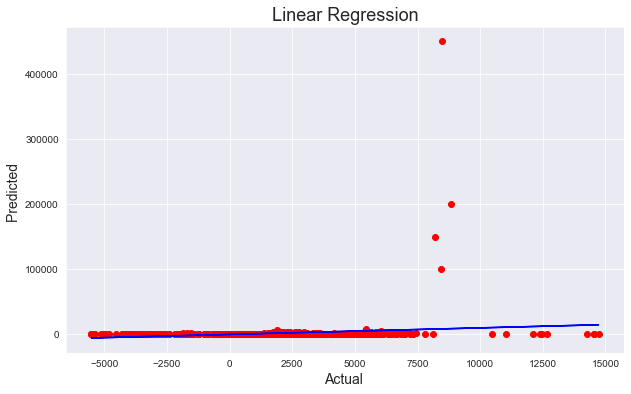

In [273]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Decision Tress

In [274]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

#training Dtc model
dtr.fit(x_train,y_train)
dtr_score=dtr.score(x_train,y_train)

#predict dtc
pred_train=dtr.predict(x_train)
pred_test=dtr.predict(x_test)

#result dtc
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9999999762194759 Testing Accuracy R2_score  0.7339107631073587
Training Mean_squared_Error  6.871727748691099 Testing Mean_squared_error  38184875.654107794
Training Absolute_Error  0.07853403141361257 Testing Absolute Error 347.3286237571952


In [275]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    dtr_cv_score=cross_val_score(dtr,x,y,cv=i)
    cv_mean=dtr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, Cross_Val_Score {cv_mean} Training Score{train_accuracy} Testing Score{test_accuracy}")

At CROSS_FOLD2, Cross_Val_Score -3176.332406916311 Training Score0.9999999762194759 Testing Score0.7339107631073587
At CROSS_FOLD3, Cross_Val_Score -2817.7249419606446 Training Score0.9999999762194759 Testing Score0.7339107631073587
At CROSS_FOLD4, Cross_Val_Score -2546.565525951876 Training Score0.9999999762194759 Testing Score0.7339107631073587
At CROSS_FOLD5, Cross_Val_Score -2745.7535118178557 Training Score0.9999999762194759 Testing Score0.7339107631073587
At CROSS_FOLD6, Cross_Val_Score -3249.972388521303 Training Score0.9999999762194759 Testing Score0.7339107631073587
At CROSS_FOLD7, Cross_Val_Score -2978.4274556121877 Training Score0.9999999762194759 Testing Score0.7339107631073587
At CROSS_FOLD8, Cross_Val_Score -3637.1159730333693 Training Score0.9999999762194759 Testing Score0.7339107631073587
At CROSS_FOLD9, Cross_Val_Score -4616.023620324263 Training Score0.9999999762194759 Testing Score0.7339107631073587


### Slected cross fold as Cv_score is its close to training score

In [276]:
#cross val with dtc
dtr_cv_score=cross_val_score(dtr,x,y,cv=2) 
dtr_mean=dtr_cv_score.mean() #mean value

print("CV_score",dtr_mean,"Training Score is ", train_accuracy," Testing Score Stands " ,test_accuracy)

CV_score -2621.1187408943383 Training Score is  0.9999999762194759  Testing Score Stands  0.7339107631073587


### Model Graph

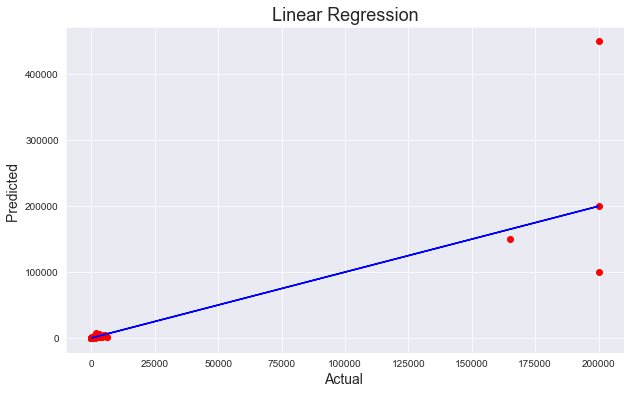

In [277]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Kneighbors Classifier

In [278]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

#training knr model
knr.fit(x_train,y_train)
knr_score=knr.score(x_train,y_train)

#predict knr
pred_train=knr.predict(x_train)
pred_test=knr.predict(x_test)

#result knr
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.5982856562492673 Testing Accuracy R2_score  0.5265090434302147
Training Mean_squared_Error  116081192.56379057 Testing Mean_squared_error  67947856.55782314
Training Absolute_Error  470.97293193717275 Testing Absolute Error 474.30308738880166


In [279]:
#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    knr_cv_score=cross_val_score(knr,x,y,cv=i)
    cv_mean=knr_cv_score.mean()

    print(f"At CROSS_FOLD {i},The Cross_Val_Mean {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD 2,The Cross_Val_Mean -1933.6863212971434 ,Training Score is 0.5982856562492673,Testing Score0.5265090434302147
At CROSS_FOLD 3,The Cross_Val_Mean -1352.8590223634058 ,Training Score is 0.5982856562492673,Testing Score0.5265090434302147
At CROSS_FOLD 4,The Cross_Val_Mean -58.77472651203586 ,Training Score is 0.5982856562492673,Testing Score0.5265090434302147
At CROSS_FOLD 5,The Cross_Val_Mean -10.745907301133775 ,Training Score is 0.5982856562492673,Testing Score0.5265090434302147
At CROSS_FOLD 6,The Cross_Val_Mean -2.2560813069397048 ,Training Score is 0.5982856562492673,Testing Score0.5265090434302147
At CROSS_FOLD 7,The Cross_Val_Mean -10.044985588800115 ,Training Score is 0.5982856562492673,Testing Score0.5265090434302147
At CROSS_FOLD 8,The Cross_Val_Mean -2.0952032523954562 ,Training Score is 0.5982856562492673,Testing Score0.5265090434302147
At CROSS_FOLD 9,The Cross_Val_Mean -2.1581383229462787 ,Training Score is 0.5982856562492673,Testing Score0.5265090434302147


### Slected cross fold as Cv_score is its close to training score

In [280]:
#cross val with k-Neighbors
knr_cv_score=cross_val_score(knr,x,y,cv=8) 
knr_mean=knr_cv_score.mean() #mean value

print("Cv_score of Model is ",knr_mean," The Training Score", train_accuracy," Testing Score Stands" ,test_accuracy)

Cv_score of Model is  -2.0952032523954562  The Training Score 0.5982856562492673  Testing Score Stands 0.5265090434302147


### Model Graph

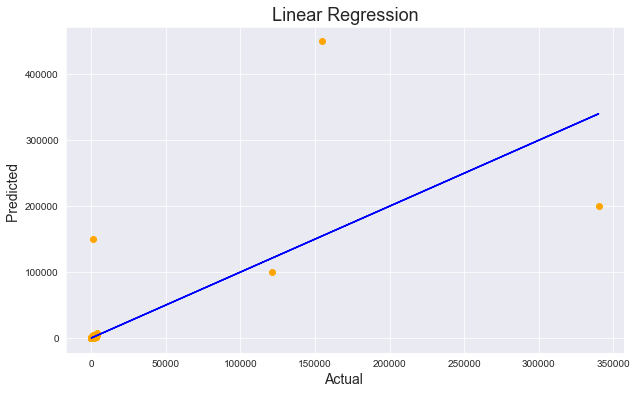

In [281]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

## Model 3 Support vector Machine

In [282]:
from sklearn.svm import SVR
svr=SVR()

#training SVR
svr.fit(x_train,y_train)
svr_score=svr.score(x_train,y_train)

#predict SVR
pred_train = svr.predict(x_train)
pred_test  = svr.predict(x_test)

#result SVR
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  -0.001151214780370946 Testing Accuracy R2_score  -0.0006963862856184111
Training Mean_squared_Error  289297180.3379404 Testing Mean_squared_error  143603956.04144073
Training Absolute_Error  902.0841105729202 Testing Absolute Error 726.0501208224103


## Cross Validation

In [283]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,5):
    svr_cv_score=cross_val_score(svr,x,y,cv=i)
    cv_mean=svr_cv_score.mean()

    print(f"CROSS_FOLD{i},Cross_Val_Score{cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy} ")

CROSS_FOLD2,Cross_Val_Score0.056453191613320464 ,Training Score is -0.001151214780370946,Testing Score-0.0006963862856184111 
CROSS_FOLD3,Cross_Val_Score0.140249618811864 ,Training Score is -0.001151214780370946,Testing Score-0.0006963862856184111 
CROSS_FOLD4,Cross_Val_Score0.17095602218365658 ,Training Score is -0.001151214780370946,Testing Score-0.0006963862856184111 


### Slected cross fold as Cv_score is its close to training score

In [284]:
svr_cv_score=cross_val_score(svr,x,y,cv=5) 
svr_mean=svr_cv_score.mean() # cross val mean

print("Cv_score of Model is ",svr_mean," The Training Score is ",train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.14926846375441533  The Training Score is  -0.001151214780370946  Testing Score Stands  -0.0006963862856184111


### Model Graph

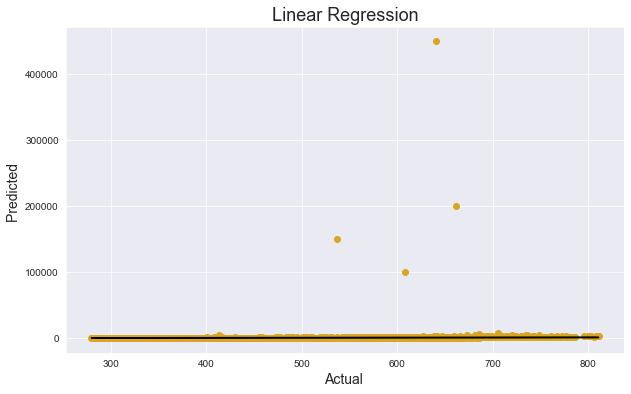

In [285]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='goldenrod')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# SGD Regressor

In [286]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()

#training SGD
sgd.fit(x_train,y_train)
sgd_score=sgd.score(x_train,y_train)

#predict
pred_train=sgd.predict(x_train)
pred_test=sgd.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.015312535907259783 Testing Accuracy R2_score  0.014910669302623192
Training Mean_squared_Error  284539740.5212557 Testing Mean_squared_error  141364280.79593578
Training Absolute_Error  2076.9994544931624 Testing Absolute Error 1893.1202090850047


## Cross Validation

In [287]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    sgd_cv_score=cross_val_score(sgd,x,y,cv=i)
    cv_mean=sgd_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score -162.83406259339193 ,Training Score is 0.015312535907259783,Testing Score0.014910669302623192
At CROSS_FOLD3, The Cross_Val_Score -84.82436900963314 ,Training Score is 0.015312535907259783,Testing Score0.014910669302623192
At CROSS_FOLD4, The Cross_Val_Score -59.80459685143928 ,Training Score is 0.015312535907259783,Testing Score0.014910669302623192
At CROSS_FOLD5, The Cross_Val_Score -21.36245837589855 ,Training Score is 0.015312535907259783,Testing Score0.014910669302623192
At CROSS_FOLD6, The Cross_Val_Score -8.48014422786943 ,Training Score is 0.015312535907259783,Testing Score0.014910669302623192
At CROSS_FOLD7, The Cross_Val_Score -15.528056724417235 ,Training Score is 0.015312535907259783,Testing Score0.014910669302623192
At CROSS_FOLD8, The Cross_Val_Score -17.541312977167433 ,Training Score is 0.015312535907259783,Testing Score0.014910669302623192
At CROSS_FOLD9, The Cross_Val_Score -30.812428878810017 ,Training Score is 0.015312535907259783

### Slected cross fold as Cv_score is its close to training score

In [288]:
# pred training for SGD Regressor
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with SGD Regressor
sgd_cv_score=cross_val_score(sgd,x,y,cv=9) 
sgd_mean=sgd_cv_score.mean() #mean value

print("Cv_score of Model is ",sgd_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -18.740743065582436  The Training Score is 0.015312535907259783 Testing Score Stands  0.014910669302623192


### Model Graph

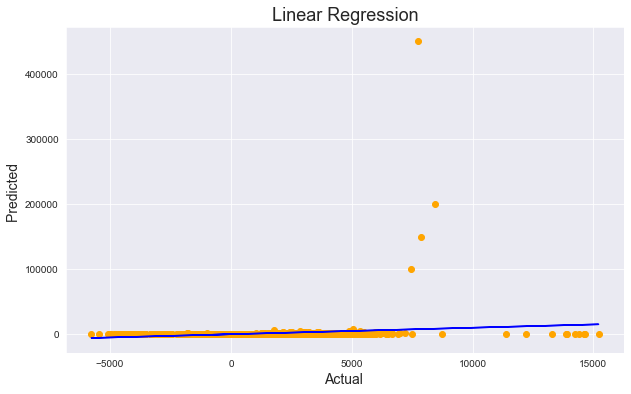

In [289]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

## Ensamble Technique

# Extra Trees Regressor

In [290]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

#training score
etr.fit(x_train,y_train)
etr_score=etr.score(x_train,y_train)

#predict
pred_train=etr.predict(x_train)
pred_test=etr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9999999735926294 Testing Accuracy R2_score  0.5392331699986945
Training Mean_squared_Error  7.630793193717277 Testing Mean_squared_error  66121893.22124307
Training Absolute_Error  0.21411431064572428 Testing Absolute Error 561.9163265306123


## Cross Validation

In [291]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    etr_cv_score=cross_val_score(etr,x,y,cv=i)
    cv_mean=etr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score -2232.232475749357 ,Training Score is 0.9999999735926294,Testing Score0.5392331699986945
At CROSS_FOLD3, The Cross_Val_Score -1922.791090770943 ,Training Score is 0.9999999735926294,Testing Score0.5392331699986945
At CROSS_FOLD4, The Cross_Val_Score -371.29339868672565 ,Training Score is 0.9999999735926294,Testing Score0.5392331699986945
At CROSS_FOLD5, The Cross_Val_Score -94.58417368628605 ,Training Score is 0.9999999735926294,Testing Score0.5392331699986945
At CROSS_FOLD6, The Cross_Val_Score -180.88376165727516 ,Training Score is 0.9999999735926294,Testing Score0.5392331699986945
At CROSS_FOLD7, The Cross_Val_Score -161.0827959790813 ,Training Score is 0.9999999735926294,Testing Score0.5392331699986945
At CROSS_FOLD8, The Cross_Val_Score -129.20415921755207 ,Training Score is 0.9999999735926294,Testing Score0.5392331699986945
At CROSS_FOLD9, The Cross_Val_Score -173.15608491399598 ,Training Score is 0.9999999735926294,Testing Score0.5392331699986

### Slected cross fold as Cv_score is its close to training score

In [292]:
# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Extra Trees
etr_cv_score=cross_val_score(etr,x,y,cv=9) 
etr_mean=etr_cv_score.mean() #mean value

print("Cv_score of Model is ",etr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -211.70627074958318  The Training Score is 0.9999999735926294 Testing Score Stands  0.5392331699986945


### Model Graph

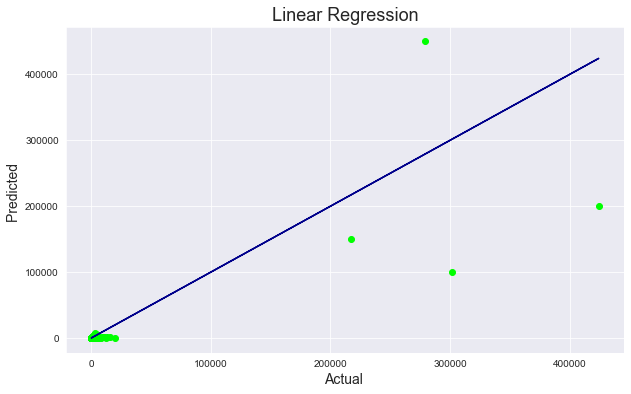

In [293]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='lime')
plt.plot(pred_test,pred_test,color='darkblue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Random Forest Regressor

In [294]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

#training Random Forest
rfr.fit(x_train,y_train)
rfr_score= rfr.score(x_train,y_train)

#predict Model
pred_train = rfr.predict(x_train)
pred_test = rfr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9293963625295594 Testing Accuracy R2_score  0.43821813766804174
Training Mean_squared_Error  20401946.219764117 Testing Mean_squared_error  80617956.62382983
Training Absolute_Error  205.54022559835454 Testing Absolute Error 536.3573146694575


## Cross Validation

In [295]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    rfr_cv_score=cross_val_score(rfr,x,y,cv=i)
    cv_mean=rfr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score -1111.9153932153442 ,Training Score is 0.9293963625295594,Testing Score0.43821813766804174
At CROSS_FOLD3, The Cross_Val_Score -1444.8423873505865 ,Training Score is 0.9293963625295594,Testing Score0.43821813766804174
At CROSS_FOLD4, The Cross_Val_Score -1406.971018002203 ,Training Score is 0.9293963625295594,Testing Score0.43821813766804174
At CROSS_FOLD5, The Cross_Val_Score -1331.1510971468254 ,Training Score is 0.9293963625295594,Testing Score0.43821813766804174
At CROSS_FOLD6, The Cross_Val_Score -1196.4230719978586 ,Training Score is 0.9293963625295594,Testing Score0.43821813766804174
At CROSS_FOLD7, The Cross_Val_Score -1282.9861994461203 ,Training Score is 0.9293963625295594,Testing Score0.43821813766804174
At CROSS_FOLD8, The Cross_Val_Score -1896.9234525103427 ,Training Score is 0.9293963625295594,Testing Score0.43821813766804174
At CROSS_FOLD9, The Cross_Val_Score -1766.5490843438245 ,Training Score is 0.9293963625295594,Testing Score0.438

### Slected cross fold as Cv_score is its close to training score

In [296]:
# pred training for Random Forest
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Random Forest
rfr_cv_score=cross_val_score(rfr,x,y,cv=8) 
rfr_mean=rfr_cv_score.mean()

print("Cv_score of Model is ",rfr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -1737.1588879354645  The Training Score is 0.9293963625295594 Testing Score Stands  0.43821813766804174


### Model Graph

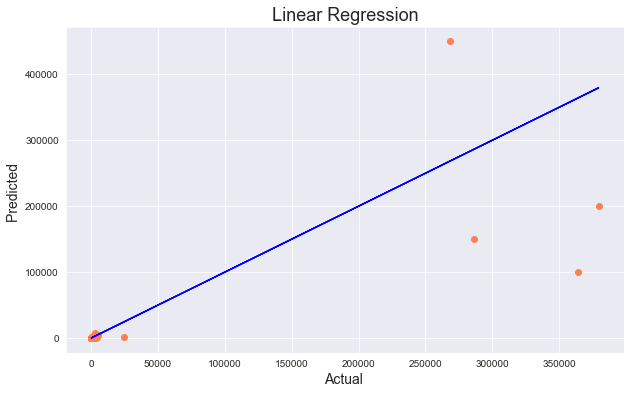

In [297]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='coral')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# ADA Boost

In [298]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

#training_ada_Boost
ada.fit(x_train,y_train)
ada_score= ada.score(x_train,y_train)

#predict_ada_Boost
pred_train = ada.predict(x_train)
pred_test = ada.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.695147014540789 Testing Accuracy R2_score  0.20163982938862934
Training Mean_squared_Error  88091696.64774406 Testing Mean_squared_error  114567895.3346292
Training Absolute_Error  2376.074611870208 Testing Absolute Error 2426.49581989634


## Cross Validation

In [299]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    ada_cv_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=ada_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score -1928.4770768580406 ,Training Score is 0.695147014540789,Testing Score0.20163982938862934
At CROSS_FOLD3, The Cross_Val_Score -1300.3920427681358 ,Training Score is 0.695147014540789,Testing Score0.20163982938862934
At CROSS_FOLD4, The Cross_Val_Score -1290.0129783440686 ,Training Score is 0.695147014540789,Testing Score0.20163982938862934
At CROSS_FOLD5, The Cross_Val_Score -480.84905987482 ,Training Score is 0.695147014540789,Testing Score0.20163982938862934
At CROSS_FOLD6, The Cross_Val_Score -743.9573488558812 ,Training Score is 0.695147014540789,Testing Score0.20163982938862934
At CROSS_FOLD7, The Cross_Val_Score -697.479379529187 ,Training Score is 0.695147014540789,Testing Score0.20163982938862934
At CROSS_FOLD8, The Cross_Val_Score -780.5086562739931 ,Training Score is 0.695147014540789,Testing Score0.20163982938862934
At CROSS_FOLD9, The Cross_Val_Score -671.328186850425 ,Training Score is 0.695147014540789,Testing Score0.20163982938862934


### Slected cross fold as Cv_score is its close to training score

In [300]:
# pred training for Ada Boost
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Ada Boost
ada_cv_score=cross_val_score(ada,x,y,cv=4) 
ada_mean=ada_cv_score.mean() # mean value

print("Cv_score of Model is ",ada_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -1404.7427128442891  The Training Score is 0.695147014540789 Testing Score Stands  0.20163982938862934


### Model Graph

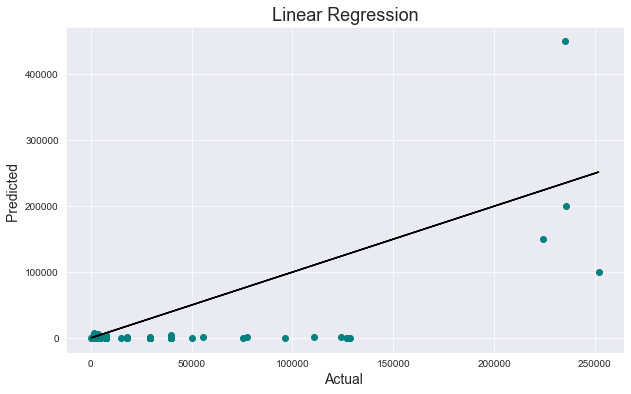

In [301]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='teal')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Gradient Boosting

In [302]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

#training_Gradient_Boost
gbr.fit(x_train,y_train)
gbr_score= gbr.score(x_train,y_train)

#predict_gbr
pred_train = gbr.predict(x_train)
pred_test = gbr.predict(x_test)

#result_gbr
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.998707472354577 Testing Accuracy R2_score  0.6608810576433066
Training Mean_squared_Error  373494.6307903606 Testing Mean_squared_error  48664932.099705674
Training Absolute_Error  161.50194656216132 Testing Absolute Error 419.8655887611487


## Cross Validation

In [303]:
from sklearn.model_selection import cross_val_score

# testing
train_accuracy=r2_score(y_train,pred_train)
test_accuracy =r2_score(y_test,pred_test)

#cross validation
for i in range(2,10):
    gbr_cv_score=cross_val_score(gbr,x,y,cv=i)
    cv_mean=gbr_cv_score.mean()
    
    print(f"At CROSS_FOLD{i}, Cross_Val_Score is {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, Cross_Val_Score is -929.7940861911895 ,Training Score is 0.998707472354577,Testing Score0.6608810576433066
At CROSS_FOLD3, Cross_Val_Score is -902.741250389448 ,Training Score is 0.998707472354577,Testing Score0.6608810576433066
At CROSS_FOLD4, Cross_Val_Score is -1016.967732144134 ,Training Score is 0.998707472354577,Testing Score0.6608810576433066
At CROSS_FOLD5, Cross_Val_Score is -924.3552672948963 ,Training Score is 0.998707472354577,Testing Score0.6608810576433066
At CROSS_FOLD6, Cross_Val_Score is -847.8027999999539 ,Training Score is 0.998707472354577,Testing Score0.6608810576433066
At CROSS_FOLD7, Cross_Val_Score is -1045.4756310975529 ,Training Score is 0.998707472354577,Testing Score0.6608810576433066
At CROSS_FOLD8, Cross_Val_Score is -1251.9638407874656 ,Training Score is 0.998707472354577,Testing Score0.6608810576433066
At CROSS_FOLD9, Cross_Val_Score is -1262.329284382222 ,Training Score is 0.998707472354577,Testing Score0.6608810576433066


### Slected cross fold as Cv_score is its close to training score

In [304]:
# pred training for Gradient Boost
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Gradient Boost
gbr_cv_score=cross_val_score(gbr,x,y,cv=8) 
gbr_mean=gbr_cv_score.mean() # mean value

print("Cv_score of Model is ",gbr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -1270.793798581525  The Training Score is 0.998707472354577 Testing Score Stands  0.6608810576433066


### Model Graph

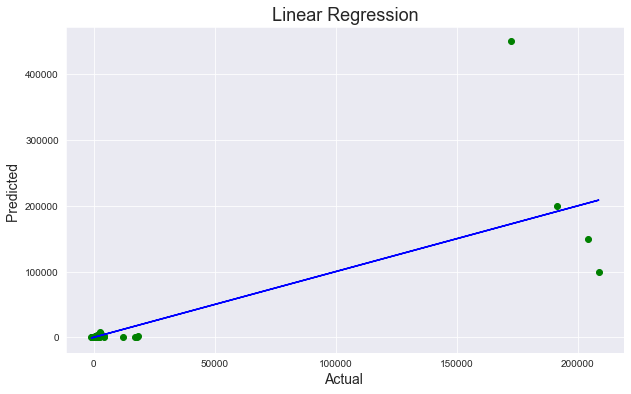

In [305]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='green')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# MLP Regressor

In [306]:
from sklearn.neural_network import MLPRegressor
mlp= MLPRegressor()

#training
#training_mlp
mlp.fit(x_train,y_train)
mlp_score= mlp.score(x_train,y_train)

#predict_mlp
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

#result_mlp
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.021963612653229325 Testing Accuracy R2_score  0.026097295821270627
Training Mean_squared_Error  282617815.32113266 Testing Mean_squared_error  139758954.90003777
Training Absolute_Error  1692.3088138021908 Testing Absolute Error 1502.464177517888


## Cross Validation

In [307]:
from sklearn.model_selection import cross_val_score

# testing
train_accuracy=r2_score(y_train,pred_train)
test_accuracy =r2_score(y_test,pred_test)

#cross validation
for i in range(2,10):
    mlp_cv_score=cross_val_score(mlp,x,y,cv=i)
    cv_mean=mlp_cv_score.mean()
    
    print(f"At CROSS_FOLD{i}, Cross_Val_Score is {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, Cross_Val_Score is -9.92099054177421 ,Training Score is 0.021963612653229325,Testing Score0.026097295821270627
At CROSS_FOLD3, Cross_Val_Score is -12.77673071234729 ,Training Score is 0.021963612653229325,Testing Score0.026097295821270627
At CROSS_FOLD4, Cross_Val_Score is -10.876822022905811 ,Training Score is 0.021963612653229325,Testing Score0.026097295821270627
At CROSS_FOLD5, Cross_Val_Score is -8.60237415697932 ,Training Score is 0.021963612653229325,Testing Score0.026097295821270627
At CROSS_FOLD6, Cross_Val_Score is -8.556526294117726 ,Training Score is 0.021963612653229325,Testing Score0.026097295821270627
At CROSS_FOLD7, Cross_Val_Score is -9.198089302113235 ,Training Score is 0.021963612653229325,Testing Score0.026097295821270627
At CROSS_FOLD8, Cross_Val_Score is -9.838483985305157 ,Training Score is 0.021963612653229325,Testing Score0.026097295821270627
At CROSS_FOLD9, Cross_Val_Score is -8.716970618693235 ,Training Score is 0.021963612653229325,Testing Sco

### Slected cross fold as Cv_score is its close to training score

In [308]:
# pred training for MLP Regressor
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with MLP Regressor
mlp_cv_score=cross_val_score(mlp,x,y,cv=8) 
mlp_mean=mlp_cv_score.mean() # mean value

print("Cv_score of Model is ",mlp_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -9.58646190118279  The Training Score is 0.021963612653229325 Testing Score Stands  0.026097295821270627


### Model Graph

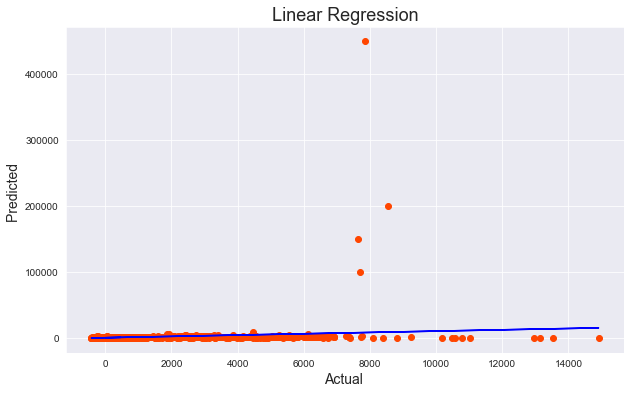

In [309]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orangered')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Bagging Regressor

In [310]:
from sklearn.ensemble import BaggingRegressor
br= BaggingRegressor()

#training
#training_mlp
br.fit(x_train,y_train)
br_score= br.score(x_train,y_train)

#predict_mlp
pred_train = br.predict(x_train)
pred_test = br.predict(x_test)

#result_mlp
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9236897183118395 Testing Accuracy R2_score  0.16513975623791632
Training Mean_squared_Error  22050963.92758391 Testing Mean_squared_error  119805802.62806907
Training Absolute_Error  224.28688045375216 Testing Absolute Error 618.5421245421245


## Cross Validation

In [311]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    br_cv_score=cross_val_score(br,x,y,cv=i)
    cv_mean=br_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score -1799.007497653062 ,Training Score is 0.9236897183118395,Testing Score0.16513975623791632
At CROSS_FOLD3, The Cross_Val_Score -1329.9217440784257 ,Training Score is 0.9236897183118395,Testing Score0.16513975623791632
At CROSS_FOLD4, The Cross_Val_Score -1044.2118083382418 ,Training Score is 0.9236897183118395,Testing Score0.16513975623791632
At CROSS_FOLD5, The Cross_Val_Score -2075.199489682065 ,Training Score is 0.9236897183118395,Testing Score0.16513975623791632
At CROSS_FOLD6, The Cross_Val_Score -1195.4055630527293 ,Training Score is 0.9236897183118395,Testing Score0.16513975623791632
At CROSS_FOLD7, The Cross_Val_Score -1753.014557817507 ,Training Score is 0.9236897183118395,Testing Score0.16513975623791632
At CROSS_FOLD8, The Cross_Val_Score -2230.9246049434664 ,Training Score is 0.9236897183118395,Testing Score0.16513975623791632
At CROSS_FOLD9, The Cross_Val_Score -2012.3674292282094 ,Training Score is 0.9236897183118395,Testing Score0.16513

### Slected cross fold as Cv_score is its close to training score

In [312]:
# pred training for Random Forest
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Random Forest
br_cv_score=cross_val_score(br,x,y,cv=7) 
br_mean=br_cv_score.mean()

print("Cv_score of Model is ",br_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -1486.5786365994568  The Training Score is 0.9236897183118395 Testing Score Stands  0.16513975623791632


### Model Graph

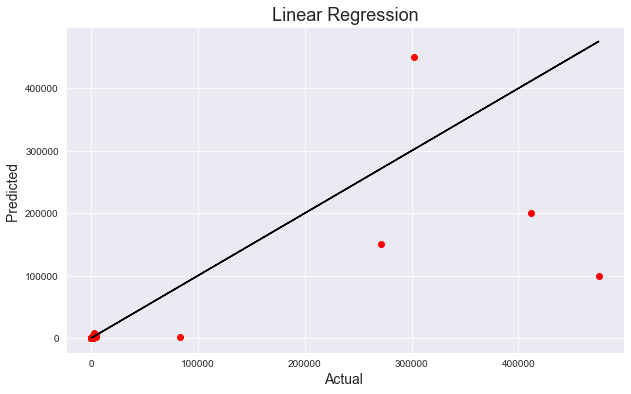

In [313]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='red')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Hyper-Parameter With Models

Extra Trees Regressor and Random Forest, Gradient Boost Regressor are working very close
we selected them due the following reasons:

- R2 Score is better for the model.
- CV Score better for these model they are nearer to training score.
- "MSE" and "MAE" are less on compare to other models.(They are close to the mean)

# Extra Trees Regressor

In [314]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

parameters={'n_estimators':[104],
            'criterion':['squared_error', 'absolute_error'],
            'max_features':['sqrt', 'log2','None']}

gsv=GridSearchCV(etr,parameters)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'criterion': 'absolute_error', 'max_features': 'sqrt', 'n_estimators': 104} Best Score  0.6573962705885498


In [327]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(criterion= 'squared_error',n_estimators= 104,max_features= 'sqrt', n_jobs=2)

#training score
etr.fit(x_train,y_train)
etr_score=etr.score(x_train,y_train)

#predict
pred_train=etr.predict(x_train)
pred_test=etr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test)) 

Training Accuracy r2_score  0.9999999440942187 Testing Accuracy R2_score  0.7499431946015338
Training Mean_squared_Error  16.154787288393397 Testing Mean_squared_error  35884157.25532085
Training Absolute_Error  1.6373131997675783 Testing Absolute Error 581.0786030686631


## Cross Validation

In [328]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    etr_cv_score=cross_val_score(etr,x,y,cv=i)
    cv_mean=etr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Score -804.9858326822387 ,Training Score is 0.9999999440942187,Testing Score0.7499431946015338
At CROSS_FOLD 3, The Cross_Val_Score -643.8943608984492 ,Training Score is 0.9999999440942187,Testing Score0.7499431946015338
At CROSS_FOLD 4, The Cross_Val_Score -119.75859327917301 ,Training Score is 0.9999999440942187,Testing Score0.7499431946015338
At CROSS_FOLD 5, The Cross_Val_Score -71.03289051545623 ,Training Score is 0.9999999440942187,Testing Score0.7499431946015338
At CROSS_FOLD 6, The Cross_Val_Score -76.9304133018405 ,Training Score is 0.9999999440942187,Testing Score0.7499431946015338
At CROSS_FOLD 7, The Cross_Val_Score -108.54987153230968 ,Training Score is 0.9999999440942187,Testing Score0.7499431946015338
At CROSS_FOLD 8, The Cross_Val_Score -96.7066533709836 ,Training Score is 0.9999999440942187,Testing Score0.7499431946015338
At CROSS_FOLD 9, The Cross_Val_Score -127.94240254199023 ,Training Score is 0.9999999440942187,Testing Score0.74994319

### Slected cross fold as Cv_score is its close to training score

In [329]:
# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Extra Trees
etr_cv_score=cross_val_score(etr,x,y,cv=8) 
etr_mean=etr_cv_score.mean() #mean value

print("Cv_score of Model is ",etr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -90.9887105280585  The Training Score is 0.9999999440942187 Testing Score Stands  0.7499431946015338


### Model Graph

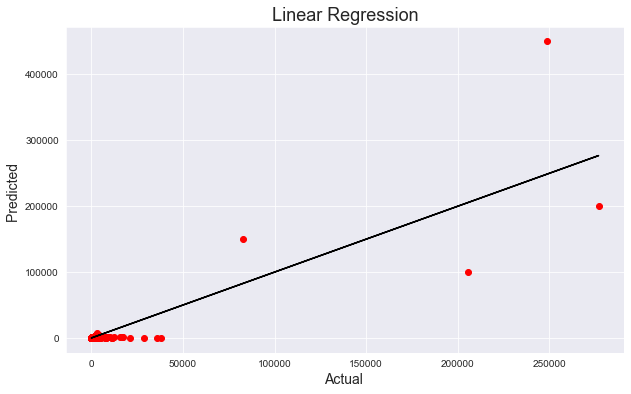

In [330]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='red')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Gradient Boosting Regressor

In [319]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={ 'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2']}

gsv=GridSearchCV(gbr,parameters,cv=15,)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'criterion': 'mse', 'loss': 'huber', 'max_features': 'log2'} Best Score  0.47504924847474983


In [323]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(criterion= 'friedman_mse', loss='huber', max_features= 'auto', n_estimators= 119,
                              min_impurity_decrease=0.0000001,min_samples_split=2 ,ccp_alpha=0.0001)

#training_Gradient_Boost
gbr.fit(x_train,y_train)
gbr_score= gbr.score(x_train,y_train)

#predict_gbr
pred_train1= gbr.predict(x_train)
pred_test1 = gbr.predict(x_test)

#result_gbr
print("Training Accuracy r2_score ",r2_score(y_train,pred_train1),"Testing Accuracy R2_score ",r2_score(y_test,pred_test1))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train1),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test1))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train1),"Testing Absolute Error",mean_absolute_error(y_test,pred_test1))

Training Accuracy r2_score  0.560138703225853 Testing Accuracy R2_score  0.6655993223084964
Training Mean_squared_Error  127104308.53791305 Testing Mean_squared_error  47987842.144292966
Training Absolute_Error  421.79699019085643 Testing Absolute Error 342.24469674217073


## Cross Validation

In [324]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train1)
test_accuracy=r2_score(y_test,pred_test1)

for i in range(2,10):
    gbr_cv_score=cross_val_score(gbr,x,y,cv=i)
    cv_mean=etr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Score -88.08072384702056 ,Training Score is 0.560138703225853,Testing Score0.6655993223084964
At CROSS_FOLD 3, The Cross_Val_Score -88.08072384702056 ,Training Score is 0.560138703225853,Testing Score0.6655993223084964
At CROSS_FOLD 4, The Cross_Val_Score -88.08072384702056 ,Training Score is 0.560138703225853,Testing Score0.6655993223084964
At CROSS_FOLD 5, The Cross_Val_Score -88.08072384702056 ,Training Score is 0.560138703225853,Testing Score0.6655993223084964
At CROSS_FOLD 6, The Cross_Val_Score -88.08072384702056 ,Training Score is 0.560138703225853,Testing Score0.6655993223084964
At CROSS_FOLD 7, The Cross_Val_Score -88.08072384702056 ,Training Score is 0.560138703225853,Testing Score0.6655993223084964
At CROSS_FOLD 8, The Cross_Val_Score -88.08072384702056 ,Training Score is 0.560138703225853,Testing Score0.6655993223084964
At CROSS_FOLD 9, The Cross_Val_Score -88.08072384702056 ,Training Score is 0.560138703225853,Testing Score0.6655993223084964


### Slected cross fold as Cv_score is its close to training score

In [325]:
# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train1)
test_accuracy=r2_score(y_test,pred_test1)

#cross val with Extra Trees
gbr_cv_score=cross_val_score(gbr,x,y,cv=8) 
gbr_mean=gbr_cv_score.mean() #mean value

print("Cv_score of Model is ",gbr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -389.4870998074722  The Training Score is 0.560138703225853 Testing Score Stands  0.6655993223084964


### Model Graph

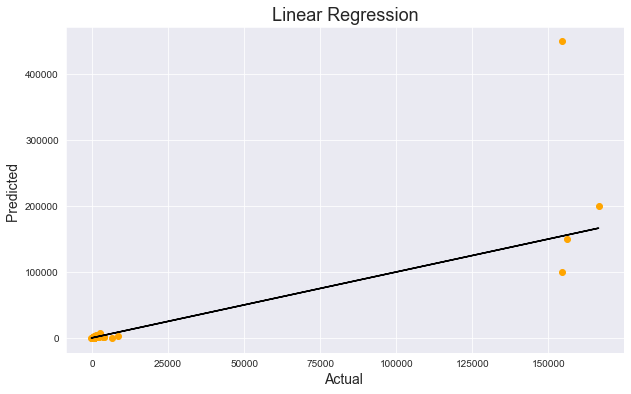

In [326]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test1,y=y_test,color='orange')
plt.plot(pred_test1,pred_test1,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Saving Model

Selected this model as its:

- R2 Score is better for the model.
- CV Score better for these model they are nearer to training score.
- "MSE" and "MAE" are less on compare to other models.(They are close to the mean)

In [331]:
import pickle
filename="zomato_pred.pkl"
pickle.dump(etr, open(filename, 'wb'))

In [332]:
import pickle
model = pickle.load(open('zomato_pred.pkl', 'rb'))
result=model.score(x_test,y_test)
print(result*100)

74.99431946015338


In [333]:
newd=pd.DataFrame([model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
newd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910
Predicted,235.576923,1153.365385,237.379808,303.725962,182.692308,332.211538,611.538462,537.5,275.480769,289.903846,645.192308,566.826923,220.673077,220.192308,1170.961538,248593.269231,210.096154,206.700721,662.5,616.826923,163.538462,274.759615,627.403846,633.173077,245.192308,1403.365385,239.423077,297.115385,233.173077,346.394231,300.0,538.942308,646.153846,9246.413462,1162.980769,395.99359,612.409856,319.471154,342.307692,300.961538,250.480769,567.836538,93.669872,1024.038462,790.048077,649.038462,342.427885,10.432692,296.153846,366.826923,739.262821,1136.538462,532.692308,651.923077,534.855769,619.230769,259.134615,2155.086538,317.307692,410.576923,3330.384615,669.230769,342.948718,242.307692,610.096154,233.221154,244.471154,267.908654,2513.660256,599.278846,183.052885,328.926282,1311.538462,366.826923,650.991587,192.307692,351.057692,251.442308,54.663462,311.538462,290.865385,316.826923,115.432692,322.115385,352.403846,356.971154,6707.067308,268.75,2203.942308,662.980769,356.891026,362.259615,610.144231,1197.115385,283.653846,241.346154,190.625,304.807692,674.038462,293.269231,...,221.153846,317.788462,250.755495,335.066106,239.423077,1211.057692,1244.230769,694.871795,404.086538,267.307692,347.355769,671.634615,288.461538,596.298077,633.173077,579.659763,2130.625,2886.961538,289.903846,14.519231,362.660256,296.730769,570.192308,352.403846,1364.903846,162.740385,329.136619,2426.602564,252.163462,625.0,1302.884615,549.755917,720.288462,691.586538,278.365385,708.653846,262.019231,248.076923,291.826923,515.865385,515.865385,261.538462,553.846154,2156.153846,630.408654,344.150641,295.673077,620.192308,336.813187,651.923077,1020.192308,907.692308,686.538462,320.3125,401.442308,258.173077,301.121795,522.596154,205.288462,356.730769,330.288462,186.057692,1872.596154,271.153846,1232.692308,678.846154,286.258013,626.802885,237.5,37.884615,588.461538,236.658654,630.769231,601.778846,2263.461538,395.673077,317.163462,330.560897,641.346154,259.134615,265.384615,679.326923,290.865385,614.903846,1186.538462,335.096154,1298.076923,1465.865385,182.692308,619.711538,257.211538,1130.288462,661.538462,1304.807692,212.596154,1175.0,317.548077,717.788462,295.192308,105.913462
Original,235.576923,1153.365385,237.379808,303.725962,182.692308,332.211538,611.538462,537.5,275.480769,289.903846,645.192308,566.826923,220.673077,220.192308,1170.961538,248593.269231,210.096154,206.700721,662.5,616.826923,163.538462,274.759615,627.403846,633.173077,245.192308,1403.365385,239.423077,297.115385,233.173077,346.394231,300.0,538.942308,646.153846,9246.413462,1162.980769,395.99359,612.409856,319.471154,342.307692,300.961538,250.480769,567.836538,93.669872,1024.038462,790.048077,649.038462,342.427885,10.432692,296.153846,366.826923,739.262821,1136.538462,532.692308,651.923077,534.855769,619.230769,259.134615,2155.086538,317.307692,410.576923,3330.384615,669.230769,342.948718,242.307692,610.096154,233.221154,244.471154,267.908654,2513.660256,599.278846,183.052885,328.926282,1311.538462,366.826923,650.991587,192.307692,351.057692,251.442308,54.663462,311.538462,290.865385,316.826923,115.432692,322.115385,352.403846,356.971154,6707.067308,268.75,2203.942308,662.980769,356.891026,3

### Model Graph